<a href="https://colab.research.google.com/github/dkenessey/Maryland_Crime/blob/main/Data_Analysis_Challenge_Maryland_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

The Maryland Department of Public Safety needs to understand crime trends over the past decades to inform their strategic planning. They aim to reduce crime rates by 10% in the next five years.

To achieve this, they need a detailed analysis of the historical data, identification of hotspots, understanding of seasonal patterns, and insights into the effectiveness of past interventions.

# Key Insights



1.   Maryland crime rates have been steadily declining since the mid-1990s.

2.   Larceny theft has consistenly been the most frequently occurring crime in Maryland.

3.   Baltimore City consistently had the highest crime rates, while Carroll and Kent Counties had the lowest rates during the 2000-2020 period. Crime rates in Baltimore City and Worcester County consistently exceed Maryland state averages, while Kent, Garrett, and Carroll Counties consistently fall below Maryland state crime rate averages.

4.   Overall, Maryland is characterized by a positive, moderate relationship between population size and crime rate; however, this pattern varies widely when jurisdictions are considered individually.

5. Murder rates, followed by rape, have experienced the greatest volatility over the years, likely due to the relatively low number of these types of crimes occurring each year.

6.   Baltimore City, Baltimore County, Worcester County, Dorchester County, Wicomico County, and Allegany County recorded the highest overall crime rates from 2016 to 2020. In Baltimore City and Baltimore County, these rates were primarily driven by the prevalence of violent crimes. In Worcester and Allegany Counties, the high overall crime rates can largely be attributed to frequent property crimes. The elevated overall crime rates in Dorchester and Wicomico Counties are likely influenced by both property and violent crimes occurring at rates higher than those seen in other counties. Policies should propose solutions that target violent vs. non-violent crimes in the respective counties.

# Required Libraries

numpy == 1.25.2 <br>
pandas == 2.0.3 <br>
matplotlib == 3.7.1 <br>
seaborn == 0.13.1 <br>
geopandas == 0.13.2 <br>
ipywidgets == 7.7.1

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib import cm
from ipywidgets import interact, widgets
from IPython.display import HTML, display

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Data

In [4]:
df_crime = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data in Motion/7-1-24-Data Analyst Challege/MD_Crime_Data.csv")
df_crime.head()

JURISDICTION  YEAR  POPULATION  MURDER  RAPE  ROBBERY  AGG. ASSAULT  \
0  Allegany County  1975       79655       3     5       20           114   
1  Allegany County  1976       83923       2     2       24            59   
2  Allegany County  1977       82102       3     7       32            85   
3  Allegany County  1978       79966       1     2       18            81   
4  Allegany County  1979       79721       1     7       18            84   

   B & E  LARCENY THEFT  M/V THEFT  ...  B & E PER 100,000 PEOPLE  \
0    669           1425         93  ...                     839.9   
1    581           1384         73  ...                     692.3   
2    592           1390        102  ...                     721.1   
3    539           1390        100  ...                     674.0   
4    502           1611         99  ...                     629.7   

   LARCENY THEFT PER 100,000 PEOPLE  M/V THEFT PER 100,000 PEOPLE  \
0                            1789.0                         116.8   
1                            1649.1                          87.0   
2                            1693.0                         124.2   
3                            1738.2                         125.1   
4                            2020.8                         124.2   

   MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                             NaN   
1                                           -36.7   
2                                            53.3   
3                                           -65.8   
4                                             0.3   

   RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                          NaN   
1                                        -62.0   
2                                        257.8   
3                                        -70.7   
4                                        251.1   

   ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                             NaN   
1                                            13.9   
2                                            36.3   
3                                           -42.2   
4                                             0.3   

   AGG. ASSAULT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                                NaN      
1                                              -50.9      
2                                               47.3      
3                                               -2.2      
4                                                4.0      

   B & E RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                           NaN   
1                                         -17.6   
2                                           4.2   
3                                          -6.5   
4                                          -6.6   

   LARCENY THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                                NaN       
1                                               -7.8       
2                                                2.7       
3                                                2.7       
4                                               16.3       

   M/V THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE  
0                                                NaN  
1                                              -25.5  
2                                               42.8  
3                                                0.7  
4                                               -0.7  

[5 rows x 38 columns]

In [5]:
df = df_crime.copy()

### Exploring Dataset

In [ ]:
df.shape

(1104, 38)

In [ ]:
df.nunique()

JURISDICTION                                               24
YEAR                                                       46
POPULATION                                               1097
MURDER                                                    120
RAPE                                                      246
ROBBERY                                                   418
AGG. ASSAULT                                              635
B & E                                                     810
LARCENY THEFT                                             988
M/V THEFT                                                 538
GRAND TOTAL                                              1030
PERCENT CHANGE                                            377
VIOLENT CRIME TOTAL                                       711
VIOLENT CRIME PERCENT                                     195
VIOLENT CRIME PERCENT CHANGE                              537
PROPERTY CRIME TOTALS                                    1009
PROPERTY

### Trend Analysis

Determine how the overall crime rates in Maryland have changed from 1975 to 2020? Identify any significant upward or downward trends.

In [ ]:
overall_crime_per_year = df.loc[:, ['YEAR', 'OVERALL CRIME RATE PER 100,000 PEOPLE']] #Extracting Year and Crime Rate data
overall_crime_per_year

YEAR  OVERALL CRIME RATE PER 100,000 PEOPLE
0     1975                                 2923.9
1     1976                                 2532.1
2     1977                                 2693.0
3     1978                                 2664.9
4     1979                                 2912.7
...    ...                                    ...
1099  2016                                 3876.7
1100  2017                                 3793.2
1101  2018                                 3023.2
1102  2019                                 2774.9
1103  2020                                 2943.0

[1104 rows x 2 columns]

In [ ]:
overall_crime_per_year.isna().sum() #Checking for missing values

YEAR                                     0
OVERALL CRIME RATE PER 100,000 PEOPLE    0
dtype: int64

In [ ]:
overall_crime_per_year['OVERALL CRIME RATE PER 100,000 PEOPLE'].min() #Identifying the lowest crime rate

788.7

In [ ]:
overall_crime_per_year['OVERALL CRIME RATE PER 100,000 PEOPLE'].max() #Identifying the lowest crime rate

13513.3

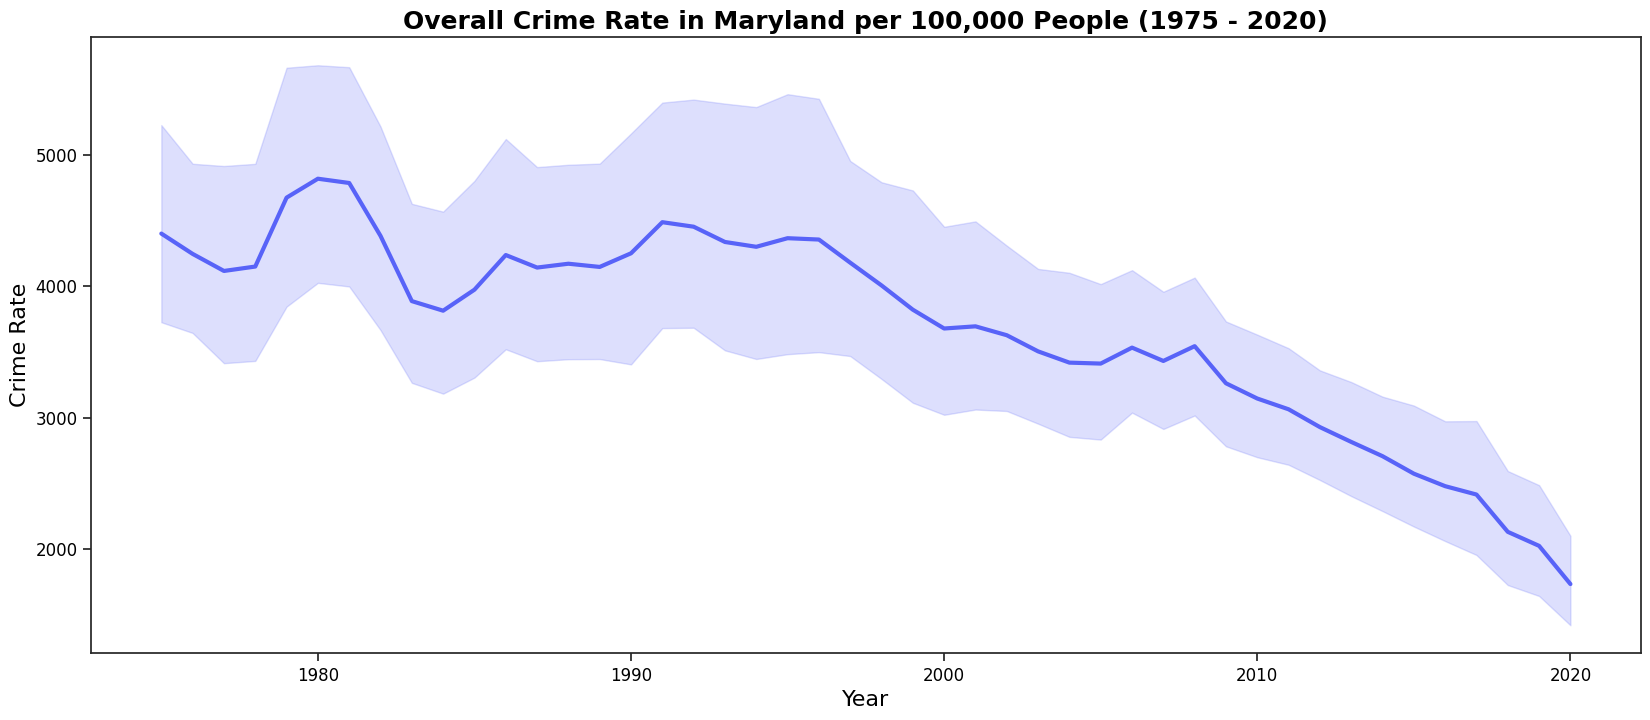

In [ ]:
#Tracking crime rate patterns through a line chart
sns.set_style("ticks")
plt.figure(figsize = (20, 8))
sns.lineplot(data=overall_crime_per_year, x='YEAR', y='OVERALL CRIME RATE PER 100,000 PEOPLE', color = "#5863F8", linewidth=3)
plt.title("Overall Crime Rate in Maryland per 100,000 People (1975 - 2020)", fontsize = 18, fontweight = "bold", color='black')
plt.ylabel("Crime Rate", fontsize = 16, color='black')
plt.xlabel("Year", fontsize = 16, color='black')
plt.yticks(fontsize = 12, color='black')
plt.xticks(fontsize = 12, color='black')
plt.show()

Based on the line chart, crime rates increase until ~1980. This rise in crime is followed by a significant decline, which begins in the early 1980s. Crime rates remain relatively stable from the mid-1980s until the mid-1990s. Starting in the mid-1990s, crime frequencies begin to decrease, a trend that continues until 2020.

### Crime Distribution

What are the most common types of crimes committed in Maryland over the years? How has the distribution of different crime types changed over time?

In [ ]:
common_crime_types = df.iloc[:, [0,1] + list(range(3, 10))] #Extracting Year and Crime Rate data
common_crime_types

JURISDICTION  YEAR  MURDER  RAPE  ROBBERY  AGG. ASSAULT  B & E  \
0      Allegany County  1975       3     5       20           114    669   
1      Allegany County  1976       2     2       24            59    581   
2      Allegany County  1977       3     7       32            85    592   
3      Allegany County  1978       1     2       18            81    539   
4      Allegany County  1979       1     7       18            84    502   
...                ...   ...     ...   ...      ...           ...    ...   
1099  Worcester County  2016       3    17       39            93    289   
1100  Worcester County  2017       2    26       43           106    220   
1101  Worcester County  2018       0    12       24            88    215   
1102  Worcester County  2019       0    12       24            94    186   
1103  Worcester County  2020       1    31       39           163    189   

      LARCENY THEFT  M/V THEFT  
0              1425         93  
1              1384         73  
2              1390        102  
3              1390        100  
4              1611         99  
...             ...        ...  
1099           1514         32  
1100           1514         39  
1101           1178         34  
1102           1086         30  
1103           1085         28  

[1104 rows x 9 columns]

In [ ]:
common_crime_types.isna().sum() #Checking for missing values

JURISDICTION     0
YEAR             0
MURDER           0
RAPE             0
ROBBERY          0
AGG. ASSAULT     0
B & E            0
LARCENY THEFT    0
M/V THEFT        0
dtype: int64

In [ ]:
#Calculating state average for each crime type
new_rows = []

crime_type_columns = [col for col in common_crime_types.columns if col not in ['YEAR', 'JURISDICTION']] #Filtering out crime type columns

for year in common_crime_types['YEAR'].unique(): #Loop through each unique year
    yearly_data = common_crime_types[common_crime_types['YEAR'] == year]

    avg_crime_rates = {crime_type: yearly_data[crime_type].mean() for crime_type in crime_type_columns} #Calculate state average for each crime type column
    avg_crime_rates['YEAR'] = year
    new_rows.append(avg_crime_rates)

state_averages = pd.DataFrame(new_rows) #Convert the list of dictionaries to a df

state_averages.head() #Display the new DataFrame

MURDER       RAPE     ROBBERY  AGG. ASSAULT        B & E  LARCENY THEFT  \
0  18.041667  53.166667  587.291667    549.666667  2411.791667    5576.416667   
1  14.666667  55.125000  509.750000    510.291667  2346.291667    5579.666667   
2  13.875000  59.666667  503.458333    616.291667  2412.666667    5460.125000   
3  14.041667  61.250000  534.208333    651.458333  2453.125000    5557.125000   
4  16.916667  67.333333  572.416667    720.125000  2608.541667    6026.416667   

    M/V THEFT  YEAR  
0  882.541667  1975  
1  739.916667  1976  
2  738.583333  1977  
3  732.750000  1978  
4  842.000000  1979

In [ ]:
duplicates = state_averages[state_averages.duplicated(subset=['YEAR'])] #Verifying there are no duplicates
duplicates

Empty DataFrame
Columns: [MURDER, RAPE, ROBBERY, AGG. ASSAULT, B & E, LARCENY THEFT, M/V THEFT, YEAR]
Index: []

In [ ]:
state_averages = state_averages.sort_values(by="YEAR").reset_index(drop=True) #Sorting data in ascending order by year

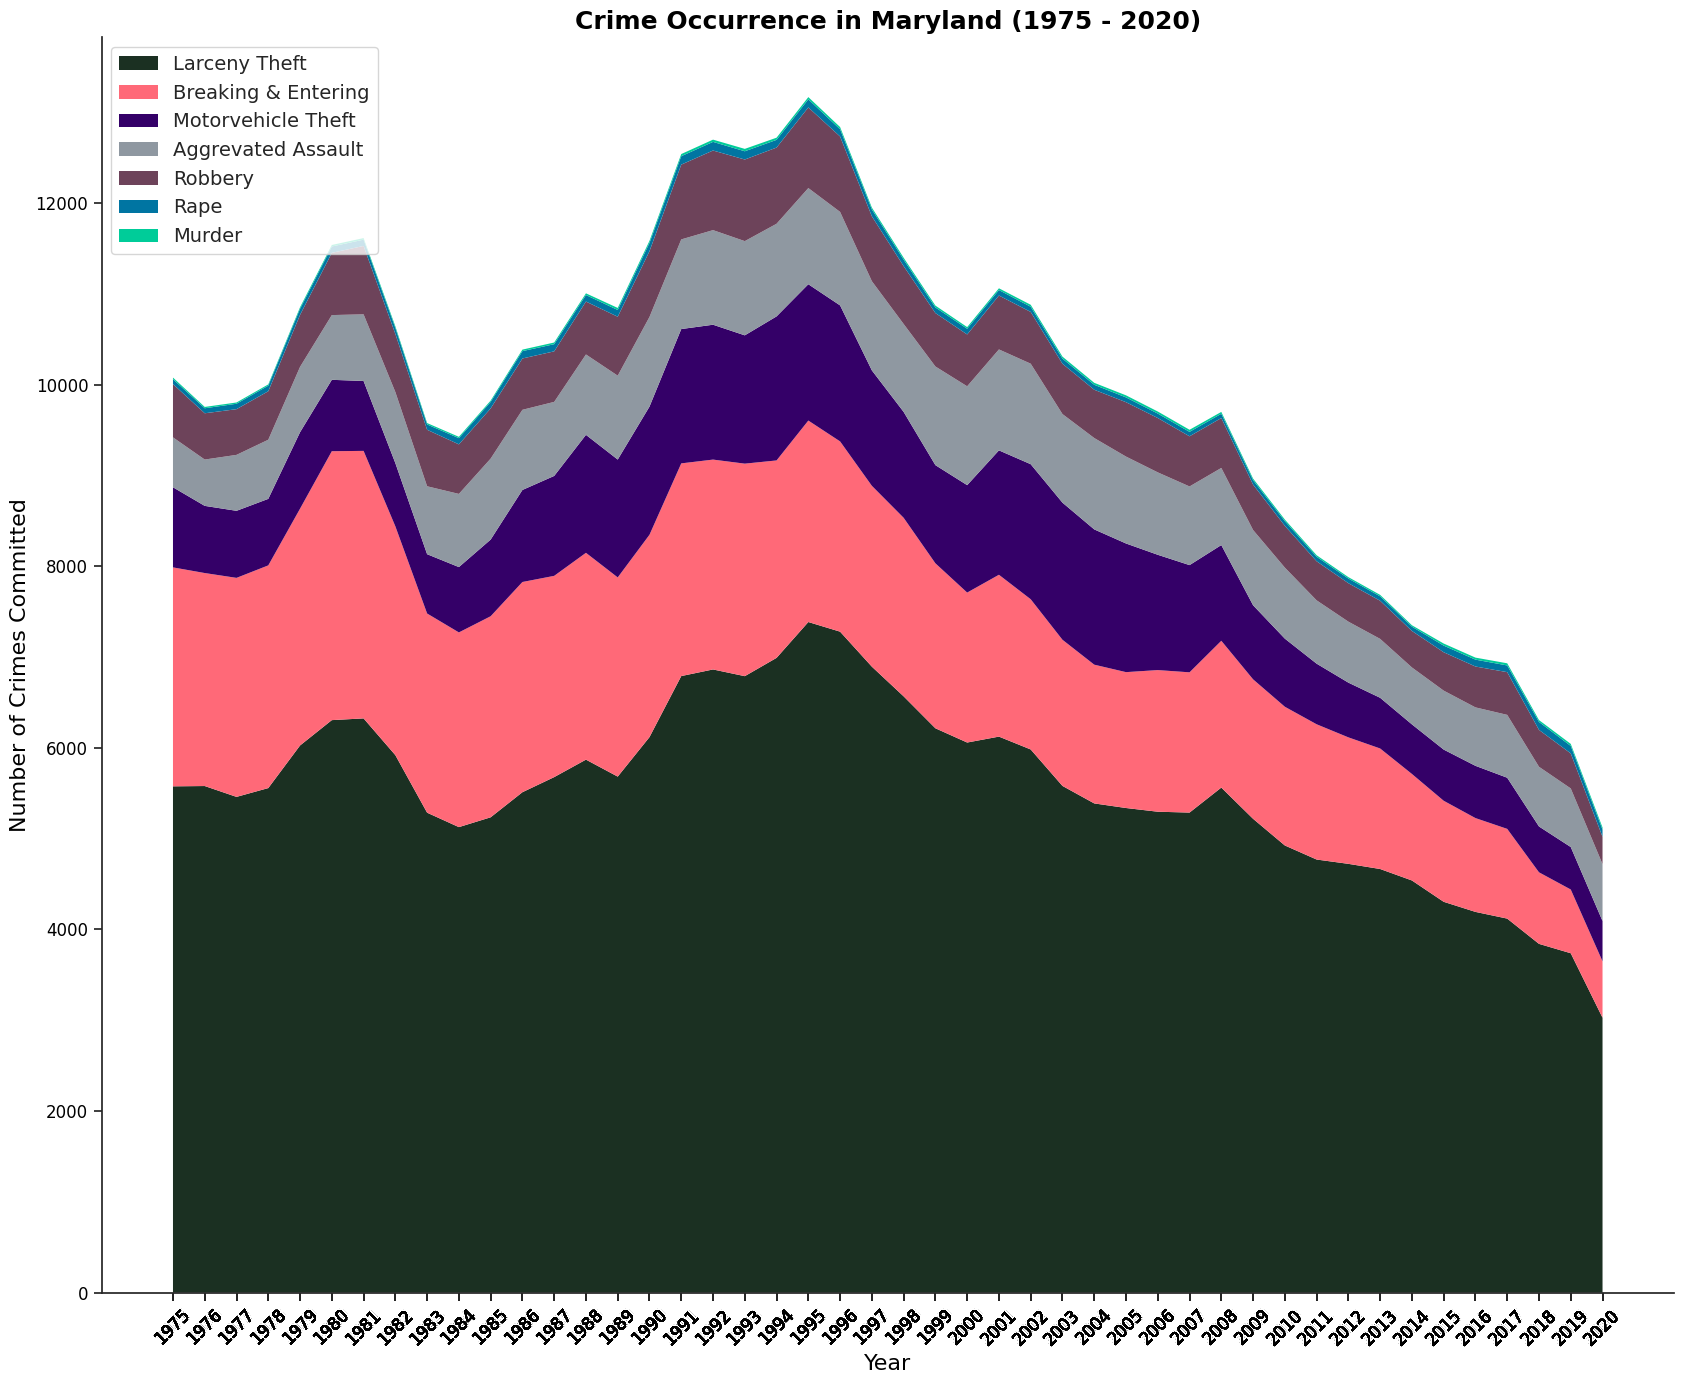

In [ ]:
#Tracking how the frequency of crimes committed changes over time through a stacked area plot
sns.set_style("ticks")
plt.figure(figsize = (17, 14))

colors = ["#1B3022", "#FF6978", "#340068",  "#8F98A1", "#6D435A", "#0075A2", "#00CC99"]
labels = ["Larceny Theft", "Breaking & Entering", "Motorvehicle Theft", "Aggrevated Assault", "Robbery", "Rape", "Murder"]

plt.stackplot(state_averages['YEAR'],
              state_averages['LARCENY THEFT'],
              state_averages['B & E'],
              state_averages['M/V THEFT'],
              state_averages['AGG. ASSAULT'],
              state_averages['ROBBERY'],
              state_averages['RAPE'],
              state_averages['MURDER'],
              colors = colors,
              edgecolor = 'none')

plt.legend(labels = labels, loc = "upper left", fontsize=14)
plt.title("Crime Occurrence in Maryland (1975 - 2020)", fontsize = 18, fontweight = "bold", color='black')
plt.ylabel("Number of Crimes Committed", fontsize = 16, color='black')
plt.xlabel("Year", fontsize = 16, color='black')
plt.yticks(fontsize = 12, color='black')
plt.xticks(common_crime_types["YEAR"], fontsize = 12, color='black', rotation = 45)
sns.despine()
plt.tight_layout()
plt.show()

The most common type of crime over the years is larceny theft followed by breaking & entering, motorvehicle thefts, and aggrevated assult.

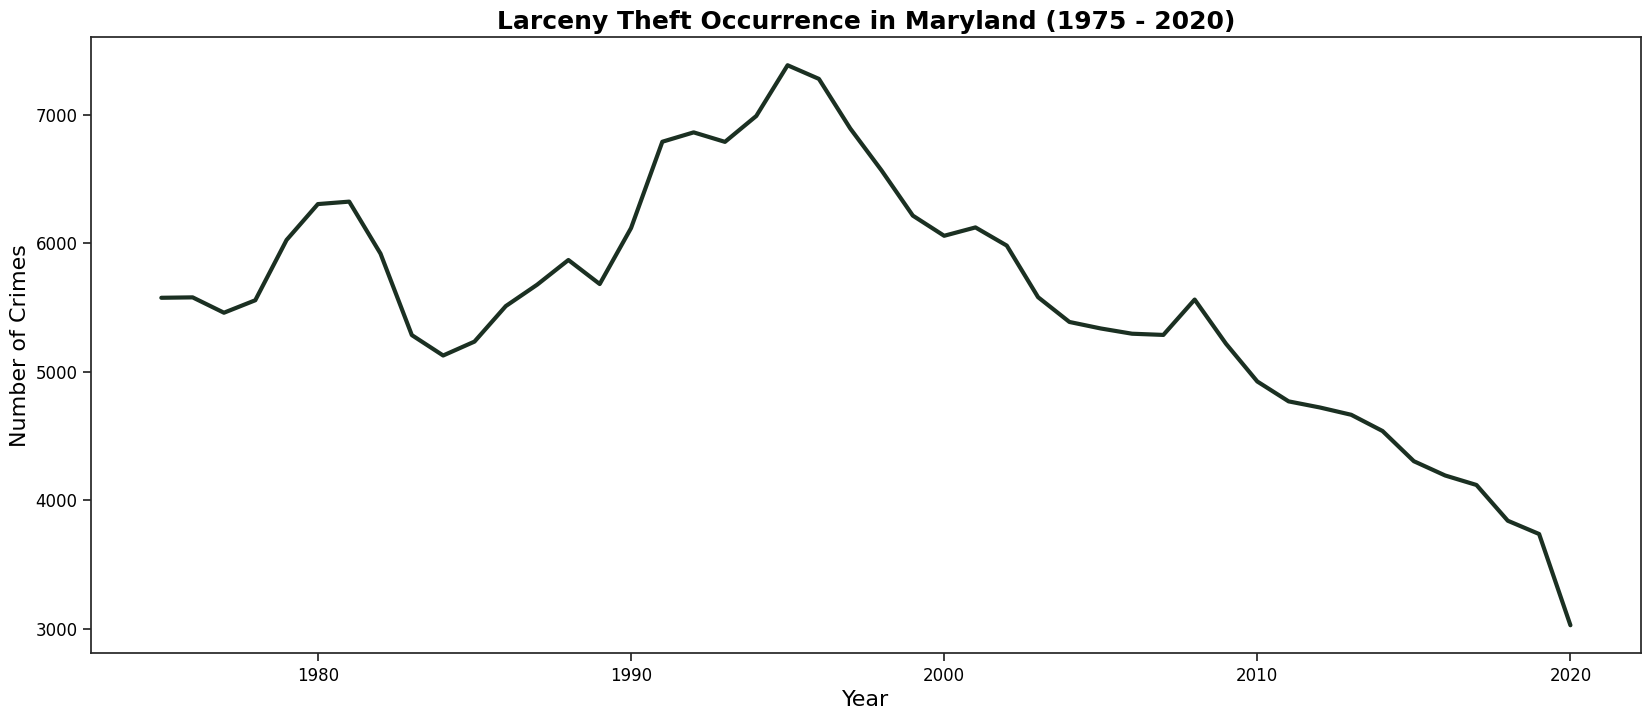

In [ ]:
#Distribution of Larceny Theft
sns.set_style("ticks")
plt.figure(figsize = (20, 8))
sns.lineplot(data=state_averages, x='YEAR', y='LARCENY THEFT', color = "#1B3022", linewidth=3)
plt.title("Larceny Theft Occurrence in Maryland (1975 - 2020)", fontsize = 18, fontweight = "bold", color='black')
plt.ylabel("Number of Crimes", fontsize = 16, color='black')
plt.xlabel("Year", fontsize = 16, color='black')
plt.yticks(fontsize = 12, color='black')
plt.xticks(fontsize = 12, color='black')
plt.show()

The number of larceny thefts began to rise in the mid-1980s, peaking in the mid-1990s, after which these crimes began to decline.

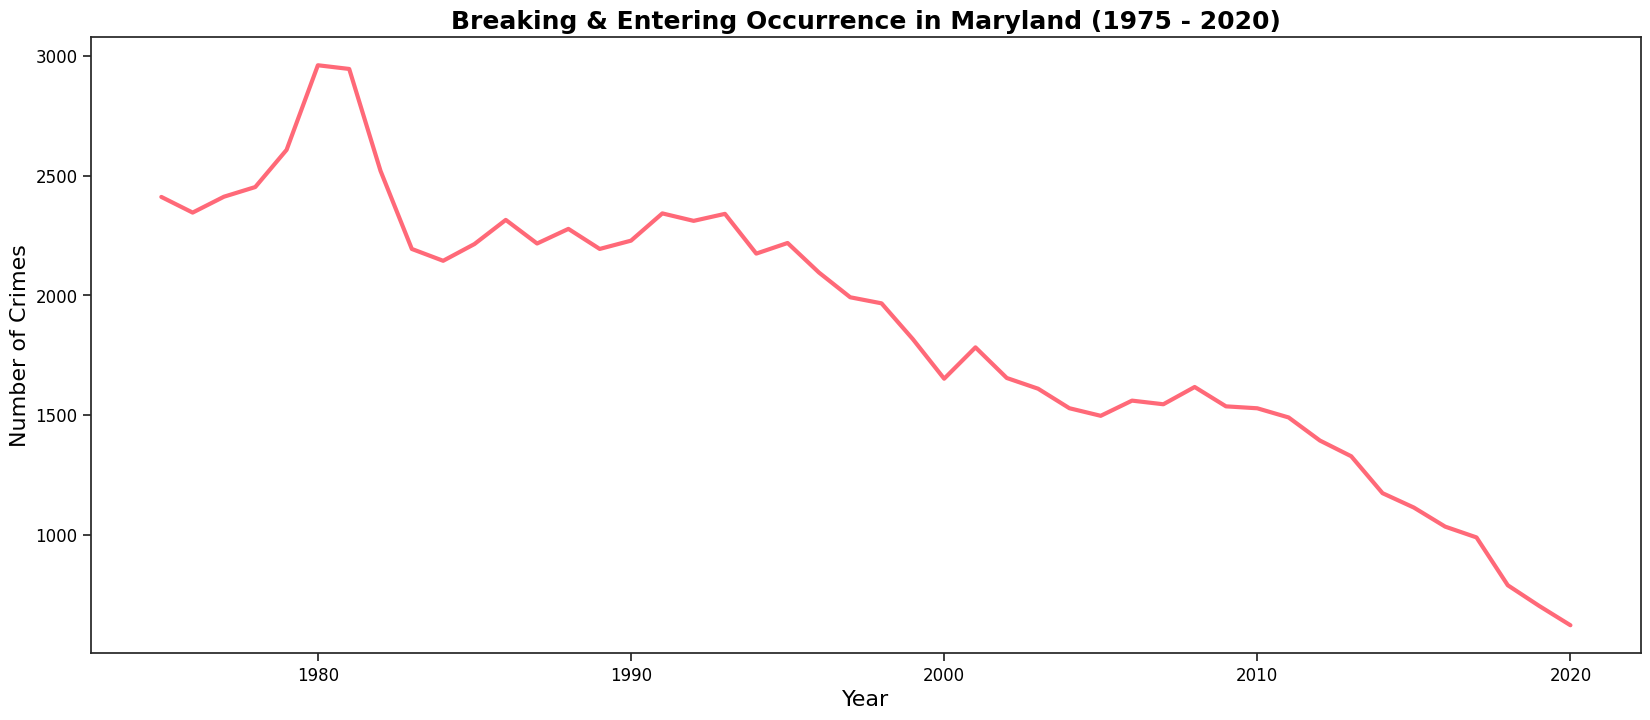

In [ ]:
#Distribution of Breaking & Entering
sns.set_style("ticks")
plt.figure(figsize = (20, 8))
sns.lineplot(data=state_averages, x='YEAR', y='B & E', color = "#FF6978", linewidth=3)
plt.title("Breaking & Entering Occurrence in Maryland (1975 - 2020)", fontsize = 18, fontweight = "bold", color='black')
plt.ylabel("Number of Crimes", fontsize = 16, color='black')
plt.xlabel("Year", fontsize = 16, color='black')
plt.yticks(fontsize = 12, color='black')
plt.xticks(fontsize = 12, color='black')
plt.show()

The number of breaking & entering type crimes seen in Maryland have been declining since 1980.

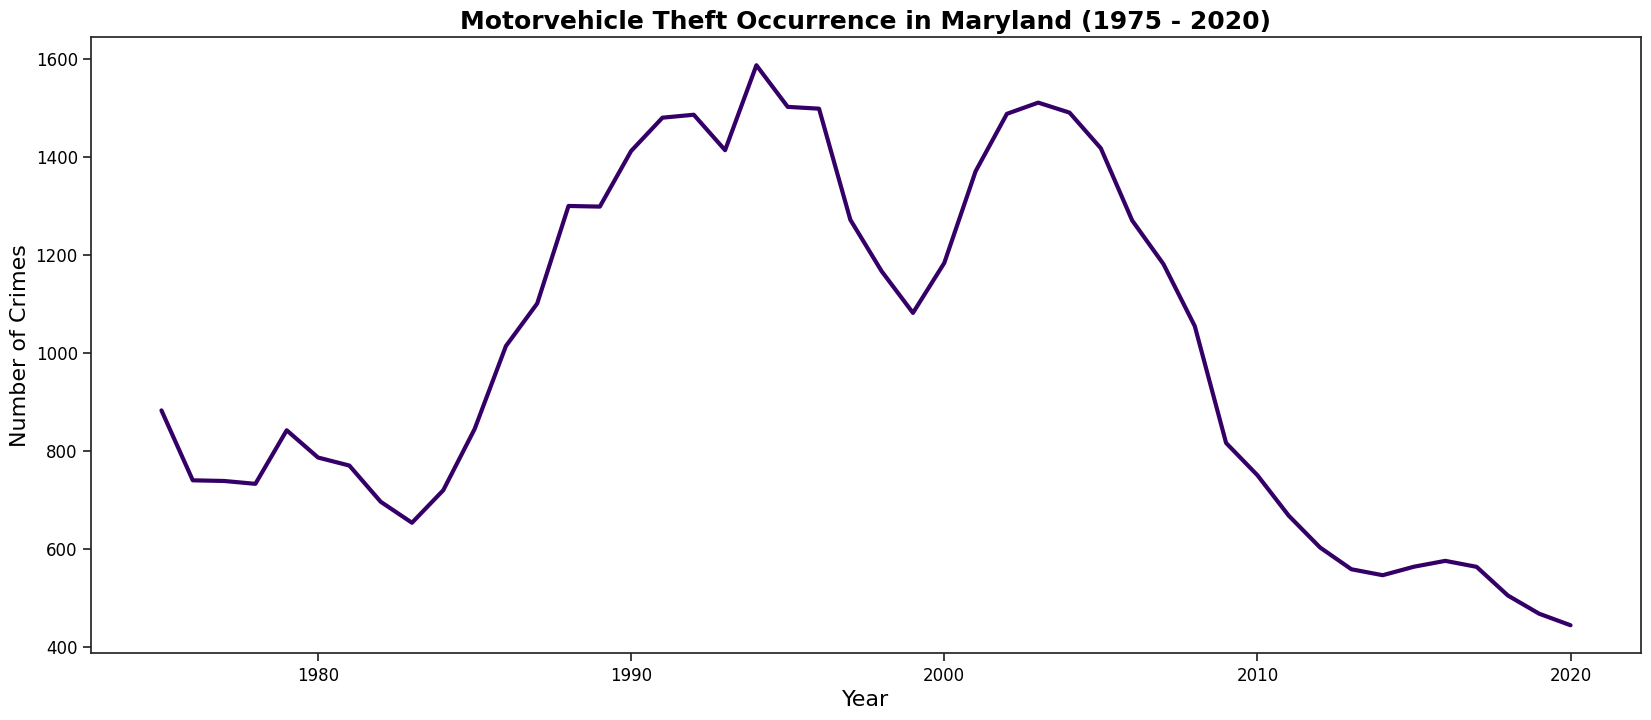

In [ ]:
#Distribution of Motorvehicle Theft
sns.set_style("ticks")
plt.figure(figsize = (20, 8))
sns.lineplot(data=state_averages, x='YEAR', y='M/V THEFT', color = "#340068", linewidth=3)
plt.title("Motorvehicle Theft Occurrence in Maryland (1975 - 2020)", fontsize = 18, fontweight = "bold", color='black')
plt.ylabel("Number of Crimes", fontsize = 16, color='black')
plt.xlabel("Year", fontsize = 16, color='black')
plt.yticks(fontsize = 12, color='black')
plt.xticks(fontsize = 12, color='black')
plt.show()

The number of motor vehicle thefts in Maryland appears to follow a cyclical pattern and has been declining since 2005.

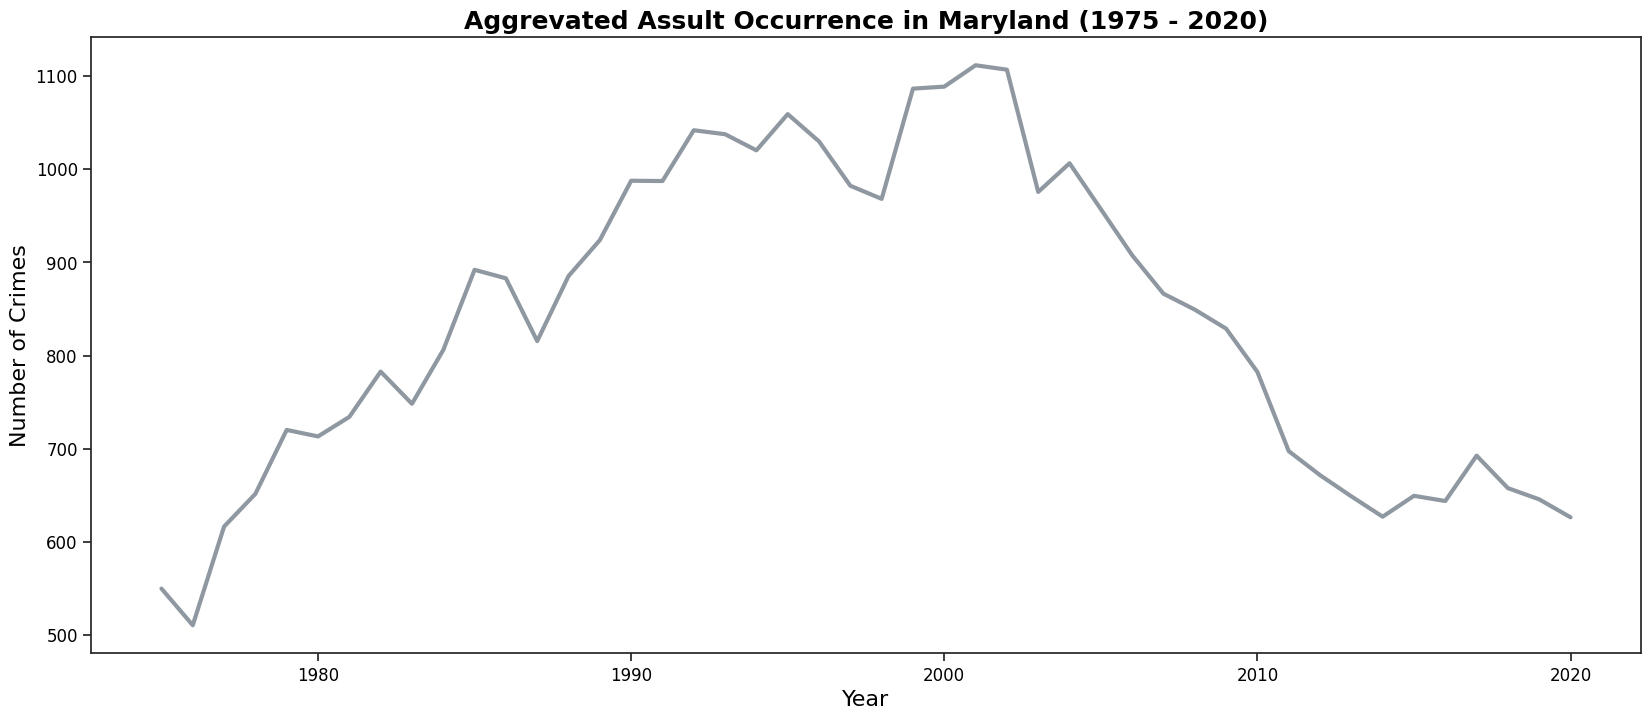

In [ ]:
#Distribution of Aggrevated Assult
sns.set_style("ticks")
plt.figure(figsize = (20, 8))
sns.lineplot(data=state_averages, x='YEAR', y='AGG. ASSAULT', color = "#8F98A1", linewidth=3)
plt.title("Aggrevated Assult Occurrence in Maryland (1975 - 2020)", fontsize = 18, fontweight = "bold", color='black')
plt.ylabel("Number of Crimes", fontsize = 16, color='black')
plt.xlabel("Year", fontsize = 16, color='black')
plt.yticks(fontsize = 12, color='black')
plt.xticks(fontsize = 12, color='black')
plt.show()

The number of aggravated assaults gradually increased until 2000, after which these crimes began to decrease and eventually stabilized around 2015.

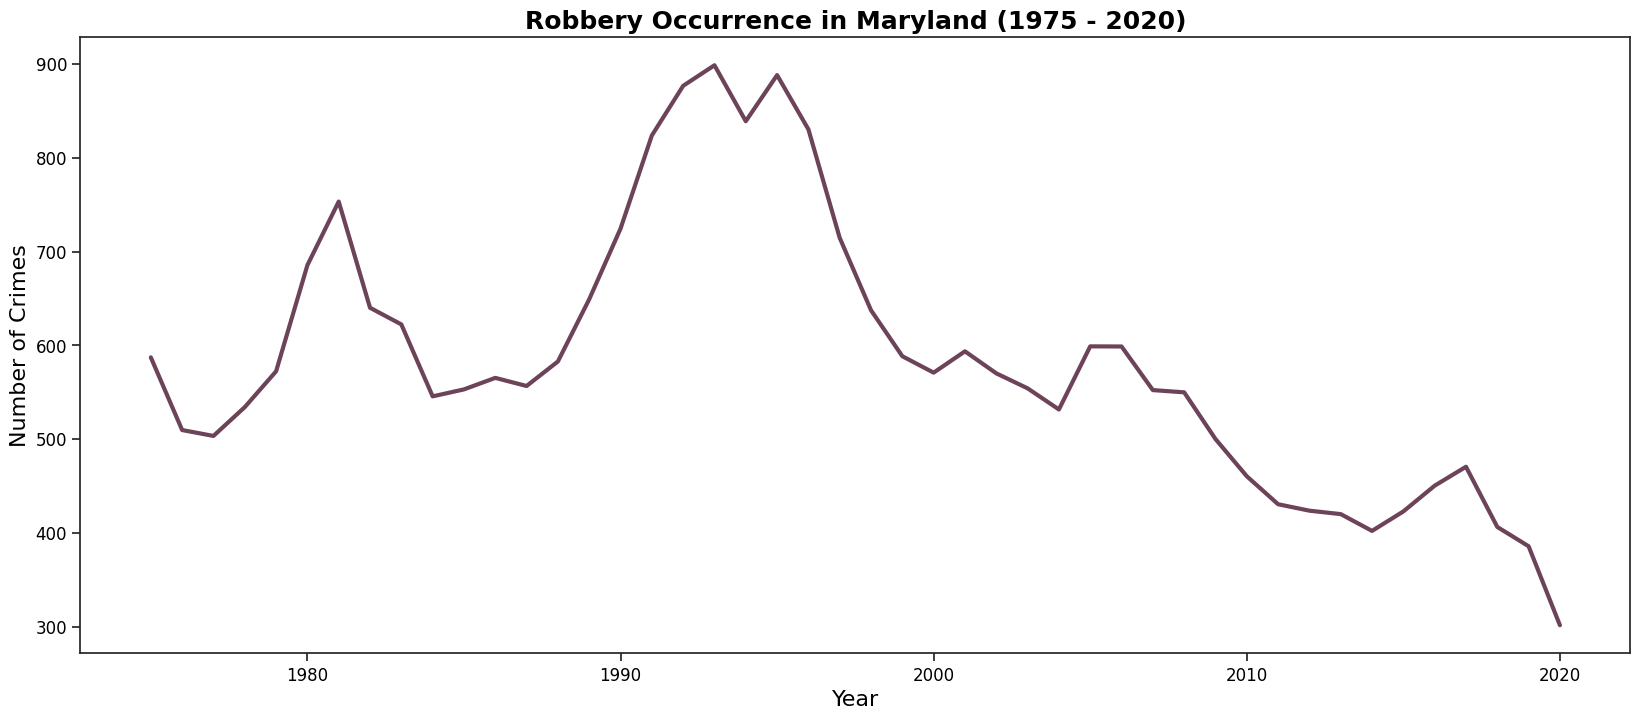

In [ ]:
#Distribution of Robbery
sns.set_style("ticks")
plt.figure(figsize = (20, 8))
sns.lineplot(data=state_averages, x='YEAR', y='ROBBERY', color = "#6D435A", linewidth=3)
plt.title("Robbery Occurrence in Maryland (1975 - 2020)", fontsize = 18, fontweight = "bold", color='black')
plt.ylabel("Number of Crimes", fontsize = 16, color='black')
plt.xlabel("Year", fontsize = 16, color='black')
plt.yticks(fontsize = 12, color='black')
plt.xticks(fontsize = 12, color='black')
plt.show()

Robberies in Maryland exhibit a cyclical pattern until the mid-1990s, after which they begin to decline.

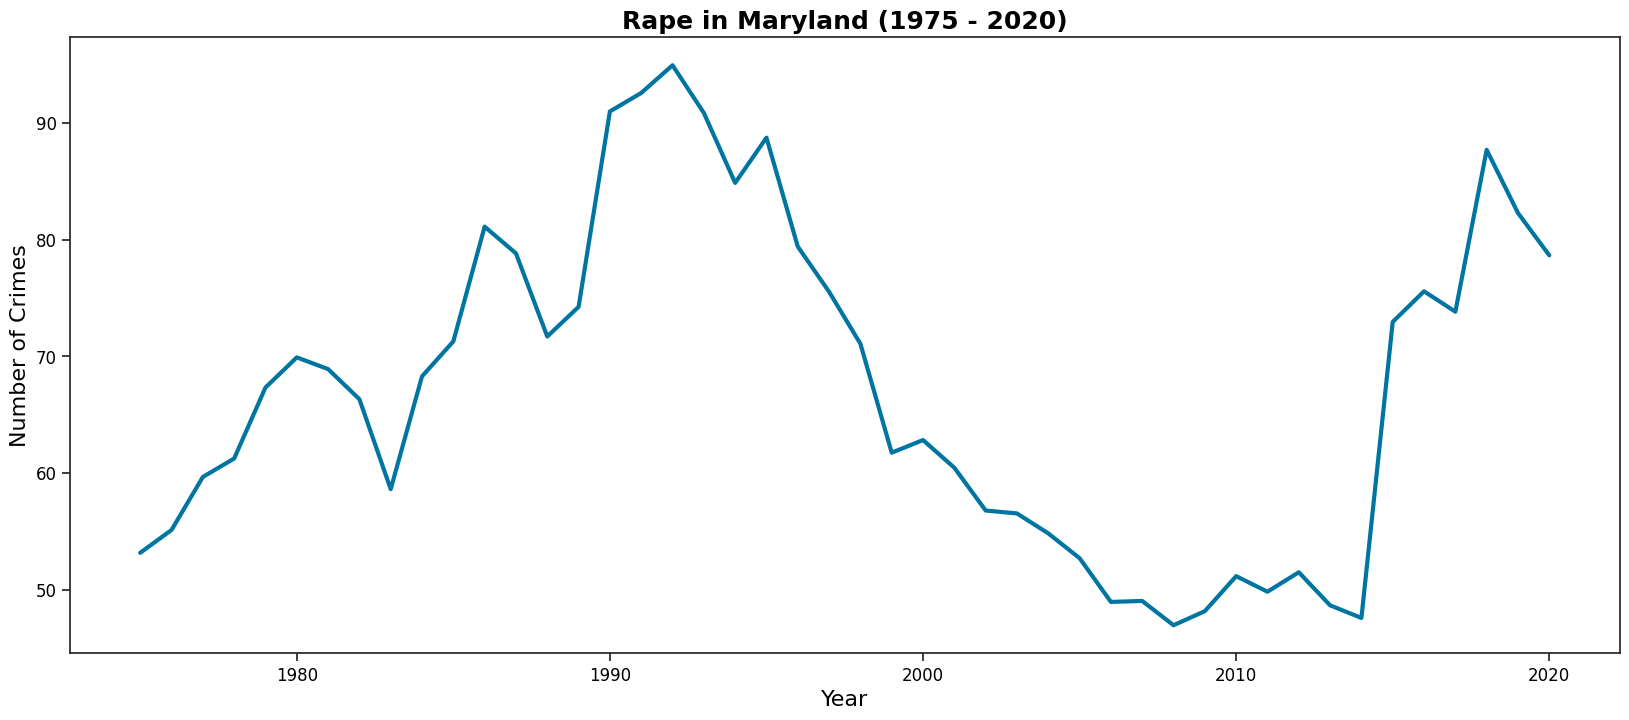

In [ ]:
#Distribution of Rape
sns.set_style("ticks")
plt.figure(figsize = (20, 8))
sns.lineplot(data=state_averages, x='YEAR', y='RAPE', color = "#0075A2", linewidth=3)
plt.title("Rape in Maryland (1975 - 2020)", fontsize = 18, fontweight = "bold", color='black')
plt.ylabel("Number of Crimes", fontsize = 16, color='black')
plt.xlabel("Year", fontsize = 16, color='black')
plt.yticks(fontsize = 12, color='black')
plt.xticks(fontsize = 12, color='black')
plt.show()

Overall, the number of rapes in Maryland gradually increased from 1975 to the mid-1990s and began to decline thereafter. Since 2014, there has been a resurgence in the number of reported rapes in Maryland. While this upward trend is notable, it's important to point out that these crimes still occur less frequently compared to the ones discussed in the previous graphs.

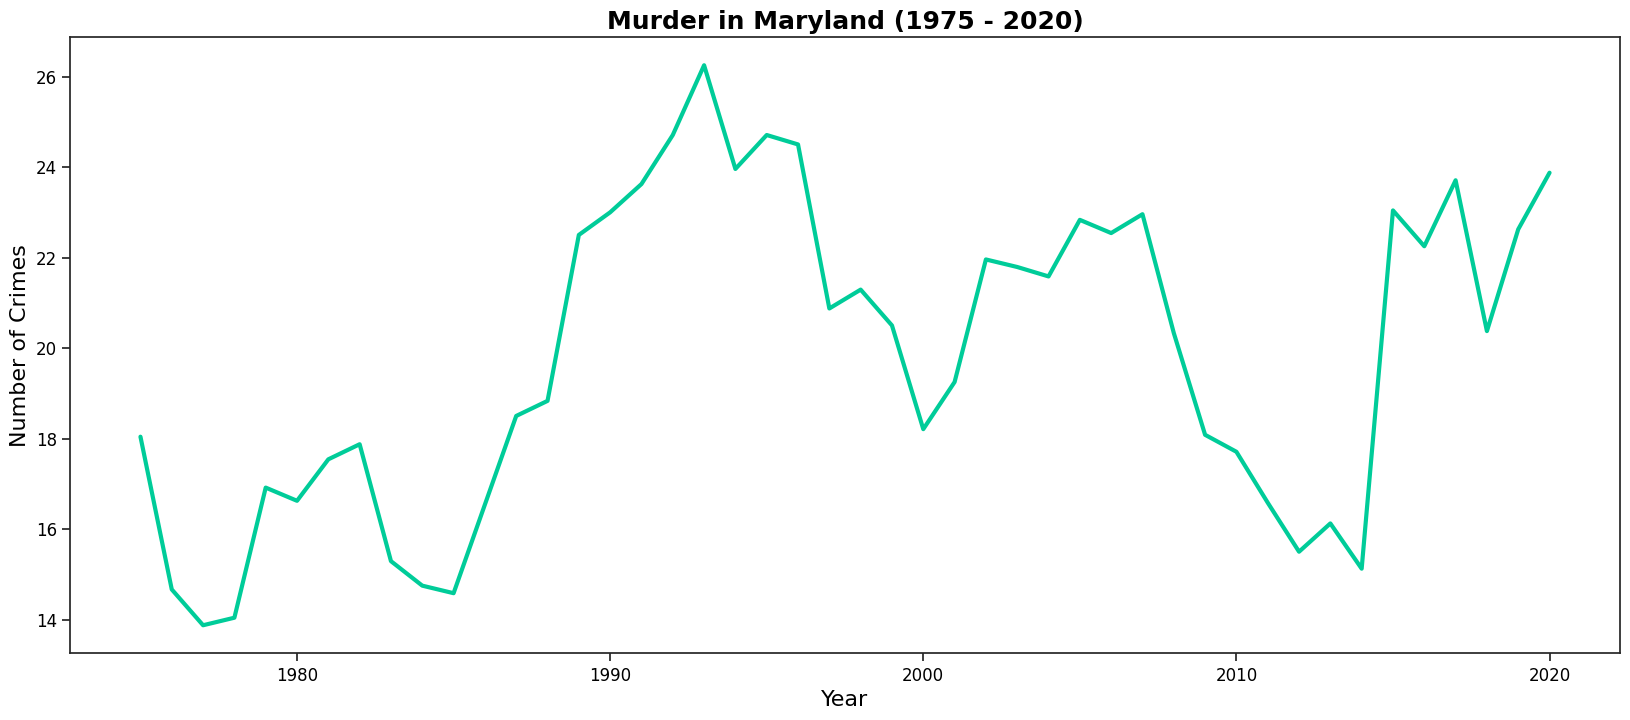

In [ ]:
#Distribution of Murder
sns.set_style("ticks")
plt.figure(figsize = (20, 8))
sns.lineplot(data=state_averages, x='YEAR', y='MURDER', color = "#00CC99", linewidth=3)
plt.title("Murder in Maryland (1975 - 2020)", fontsize = 18, fontweight = "bold", color='black')
plt.ylabel("Number of Crimes", fontsize = 16, color='black')
plt.xlabel("Year", fontsize = 16, color='black')
plt.yticks(fontsize = 12, color='black')
plt.xticks(fontsize = 12, color='black')
plt.show()

Murder is the least frequently committed crime in Maryland and appears to exhibit a cyclical pattern. Since 2015, there has been an increase in the number of murders committed.

### Geographical Analysis

Which jurisdictions have the highest and lowest crime rates? How do these rates compare to the state average?

In [ ]:
crime_by_jurisdiction = df.loc[:, ['YEAR', 'JURISDICTION', 'OVERALL CRIME RATE PER 100,000 PEOPLE']] #Extracting relevant columns
crime_by_jurisdiction

YEAR      JURISDICTION  OVERALL CRIME RATE PER 100,000 PEOPLE
0     1975   Allegany County                                 2923.9
1     1976   Allegany County                                 2532.1
2     1977   Allegany County                                 2693.0
3     1978   Allegany County                                 2664.9
4     1979   Allegany County                                 2912.7
...    ...               ...                                    ...
1099  2016  Worcester County                                 3876.7
1100  2017  Worcester County                                 3793.2
1101  2018  Worcester County                                 3023.2
1102  2019  Worcester County                                 2774.9
1103  2020  Worcester County                                 2943.0

[1104 rows x 3 columns]

##### Counties with the lowest crime rates by year

During the 1970-1990 period, Garrett and Caroline counties appeared to have the lowest crime rates. From 2000 to 2015, Carroll County consistently had the lowest crime rates. In the more recent years (2015-2020), Kent County has shown the lowest crime rates.

In [ ]:
lowest_crime_counties = []

for year, group in crime_by_jurisdiction.groupby('YEAR'): #Group by year and iterate over groups
    min_crime_row = group.loc[group['OVERALL CRIME RATE PER 100,000 PEOPLE'].idxmin()] #Find the row with the minimum crime rate for the current year
    county_with_lowest_crime = min_crime_row['JURISDICTION'] #Extract county with the lowest crime rate
    lowest_crime_counties.append({ #Create dictionaries containing the relevant information
        'Year': year,
        'County': county_with_lowest_crime,
        'Crime_Rate': min_crime_row['OVERALL CRIME RATE PER 100,000 PEOPLE']})

lowest_crime_counties_df = pd.DataFrame(lowest_crime_counties) #Convert dictionaries to df

print("Counties with the lowest crime rate for each year:\n", lowest_crime_counties_df)

Counties with the lowest crime rate for each year:
     Year               County  Crime_Rate
0   1975       Garrett County      2049.5
1   1976       Garrett County      2083.7
2   1977       Garrett County      1918.6
3   1978       Garrett County      2002.8
4   1979       Garrett County      2305.4
5   1980       Garrett County      2547.0
6   1981       Garrett County      2624.6
7   1982       Garrett County      2388.5
8   1983       Carroll County      2212.2
9   1984      Caroline County      2118.9
10  1985       Garrett County      1822.3
11  1986       Garrett County      2235.7
12  1987      Caroline County      2185.7
13  1988          Kent County      2205.6
14  1989      Caroline County      2097.7
15  1990      Caroline County      2123.2
16  1991       Garrett County      2056.0
17  1992       Garrett County      2191.8
18  1993      Caroline County      2243.0
19  1994       Garrett County      2223.7
20  1995       Garrett County      2008.0
21  1996       Garrett C

##### Counties with the highest crime rates by year

During the 1970s, Worcester County consistently had the highest crime rates. From the 1980s to 2020, Baltimore City has consistently been characterized by the highest crime rates.

In [ ]:
highest_crime_counties = []

for year, group in crime_by_jurisdiction.groupby('YEAR'): #Group by year and iterate over groups
    max_crime_row = group.loc[group['OVERALL CRIME RATE PER 100,000 PEOPLE'].idxmax()] #Find the row with the maximum crime rate for the current year
    county_with_highest_crime = max_crime_row['JURISDICTION'] #Extract county with the highest crime rate
    highest_crime_counties.append({ #Create dictionaries containing the relevant information
        'Year': year,
        'County': county_with_highest_crime,
        'Crime_Rate': max_crime_row['OVERALL CRIME RATE PER 100,000 PEOPLE']})

highest_crime_counties_df = pd.DataFrame(highest_crime_counties) #Convert dictionaries to df

print("Counties with the highest crime rate for each year:\n", highest_crime_counties_df)

Counties with the highest crime rate for each year:
     Year                  County  Crime_Rate
0   1975        Worcester County      9560.2
1   1976        Worcester County      8844.9
2   1977        Worcester County      9208.7
3   1978        Worcester County      9549.3
4   1979        Worcester County     12118.4
5   1980        Worcester County     10312.5
6   1981        Worcester County      9954.5
7   1982          Baltimore City      9297.7
8   1983          Baltimore City      8699.9
9   1984          Baltimore City      8480.4
10  1985        Worcester County      9125.9
11  1986        Worcester County     10270.0
12  1987          Baltimore City      8714.8
13  1988          Baltimore City      9310.9
14  1989          Baltimore City      9484.5
15  1990          Baltimore City     10753.2
16  1991          Baltimore City     11564.2
17  1992          Baltimore City     12115.0
18  1993          Baltimore City     12765.6
19  1994          Baltimore City     12754.1
20

In [ ]:
new_rows = []

for year in crime_by_jurisdiction['YEAR'].unique(): #Loop through each unique year in the df
    yearly_data = crime_by_jurisdiction[crime_by_jurisdiction['YEAR'] == year] #Filter the df by year
    avg_crime_rate = yearly_data['OVERALL CRIME RATE PER 100,000 PEOPLE'].mean()  #Calculate the average crime rate by year
    new_rows.append({'YEAR': year, 'JURISDICTION': 'State Average', 'OVERALL CRIME RATE PER 100,000 PEOPLE': avg_crime_rate}) #Append the new rows as dictionaries
state_averages = pd.DataFrame(new_rows) #Convert dictionaries to a df

df_with_state_averages = pd.concat([crime_by_jurisdiction, state_averages], ignore_index=True) #Concatenate original df and the one containing state averages
df_with_state_averages

YEAR     JURISDICTION  OVERALL CRIME RATE PER 100,000 PEOPLE
0     1975  Allegany County                            2923.900000
1     1976  Allegany County                            2532.100000
2     1977  Allegany County                            2693.000000
3     1978  Allegany County                            2664.900000
4     1979  Allegany County                            2912.700000
...    ...              ...                                    ...
1145  2018    State Average                            2132.395833
1146  2019    State Average                            2025.720833
1147  2020    State Average                            1735.162500
1148  2015    State Average                            2574.895833
1149  2016    State Average                            2479.920833

[1150 rows x 3 columns]

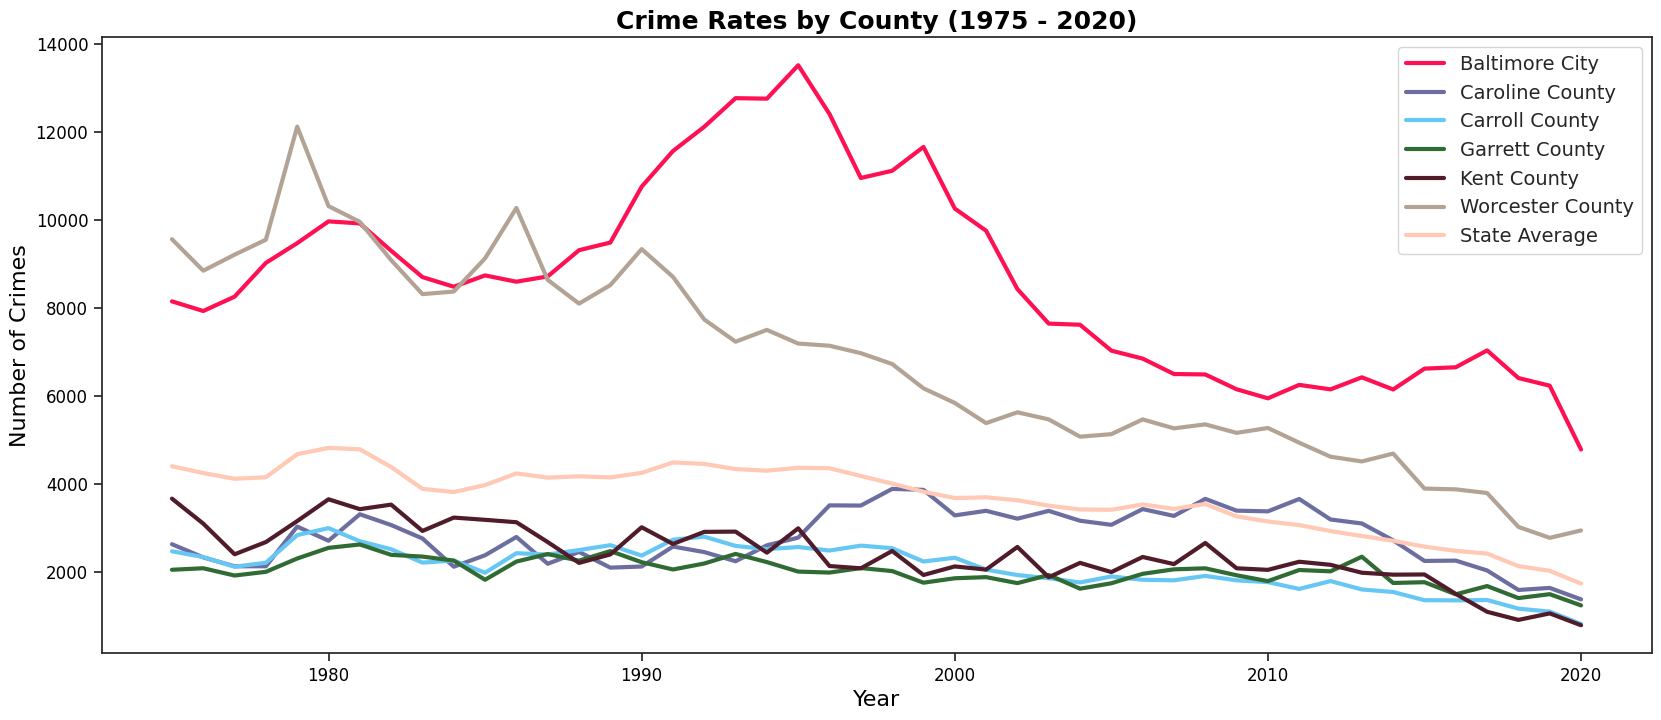

In [ ]:
counties_to_extract = ['Garrett County', 'Carroll County', 'Caroline County', 'Kent County', 'Worcester County', 'Baltimore City', 'State Average'] #List containing counties with highest and lowest crime rates

filtered_df = df_with_state_averages[df_with_state_averages['JURISDICTION'].isin(counties_to_extract)] #Extracting relevant counties
filtered_df

#Visualizing changes in crime rates
sns.set_style("ticks")
plt.figure(figsize = (20, 8))
colors = ["#FF1053", "#6C6EA0", "#66C7F4", "#306B34", "#511C29", "#B3A394", "#FFC9B5"]

sns.lineplot(data=filtered_df, x='YEAR', y='OVERALL CRIME RATE PER 100,000 PEOPLE', hue='JURISDICTION', palette = colors, linewidth=3)
plt.title("Crime Rates by County (1975 - 2020)", fontsize = 18, fontweight = "bold", color='black')
plt.ylabel("Number of Crimes", fontsize = 16, color='black')
plt.xlabel("Year", fontsize = 16, color='black')
plt.yticks(fontsize = 12, color='black')
plt.xticks(fontsize = 12, color='black')
plt.legend(fontsize=14)
plt.show()

Based on the line chart, crime rates in Baltimore City and Worcester County consistently exceed Maryland state averages. The remaining counties consistently fall below Maryland state averages, with the exception of Caroline County, which was below the state averages before 2000 and comparable to state averages thereafter.

### Population Correlation

Is there a correlation between population size and crime rates in different jurisdictions? Does a larger population necessarily mean higher crime rates?

In [ ]:
crime_by_population_size = df.loc[:, ['JURISDICTION', 'POPULATION', 'OVERALL CRIME RATE PER 100,000 PEOPLE']] #Extracting relevant columns
crime_by_population_size

JURISDICTION  POPULATION  OVERALL CRIME RATE PER 100,000 PEOPLE
0      Allegany County       79655                                 2923.9
1      Allegany County       83923                                 2532.1
2      Allegany County       82102                                 2693.0
3      Allegany County       79966                                 2664.9
4      Allegany County       79721                                 2912.7
...                ...         ...                                    ...
1099  Worcester County       51255                                 3876.7
1100  Worcester County       51408                                 3793.2
1101  Worcester County       51304                                 3023.2
1102  Worcester County       51606                                 2774.9
1103  Worcester County       52191                                 2943.0

[1104 rows x 3 columns]

In [ ]:
crime_by_population_size.isna().sum() #Checking for missing values

JURISDICTION                             0
POPULATION                               0
OVERALL CRIME RATE PER 100,000 PEOPLE    0
dtype: int64

In [ ]:
crime_by_population_size['POPULATION'].sort_values(ascending=True) #Sorting population size in ascending order

646      16200
648      16225
644      16640
647      16647
649      16680
        ...   
731    1047303
732    1054933
735    1055918
734    1057224
733    1062595
Name: POPULATION, Length: 1104, dtype: int64

0.4042033298490489


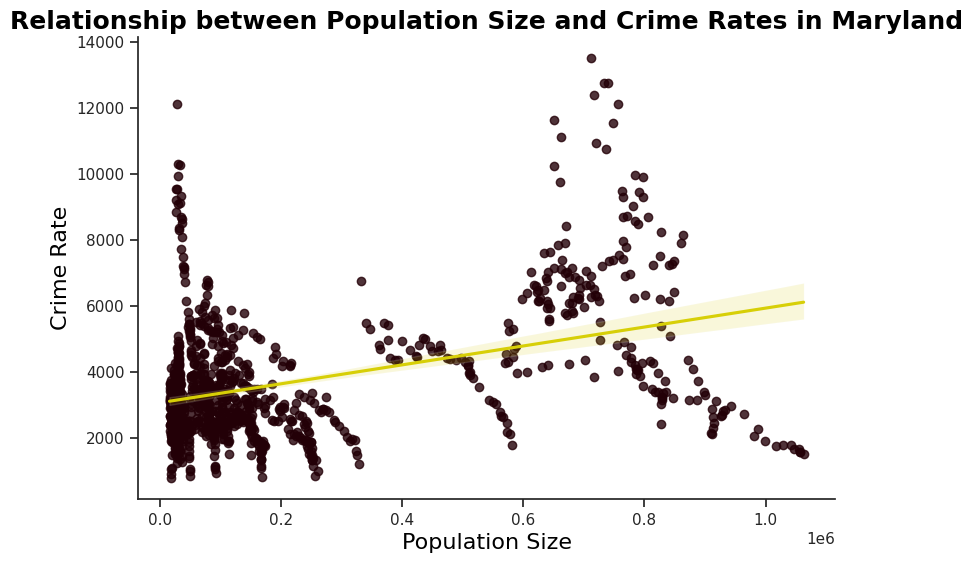

In [ ]:
#Correlation between population size and crime rate
correlation_matrix_ALL = crime_by_population_size['POPULATION'].corr(crime_by_population_size['OVERALL CRIME RATE PER 100,000 PEOPLE'])
print(correlation_matrix_ALL)

sns.set_style("ticks")
plt.figure(figsize = (9, 6))
sns.regplot(x = "POPULATION",
            y = "OVERALL CRIME RATE PER 100,000 PEOPLE",
            data = crime_by_population_size,
            scatter_kws = {'color': '#230007'},
            line_kws = {'color': '#D7CF07'})
plt.title("Relationship between Population Size and Crime Rates in Maryland",
          fontsize = 18,
          weight = "bold",
          color = 'black')
plt.xlabel("Population Size", color = 'black', fontsize = 16)
plt.ylabel("Crime Rate", color = 'black', fontsize = 16)
sns.despine()
plt.show()

-0.6673012789933523


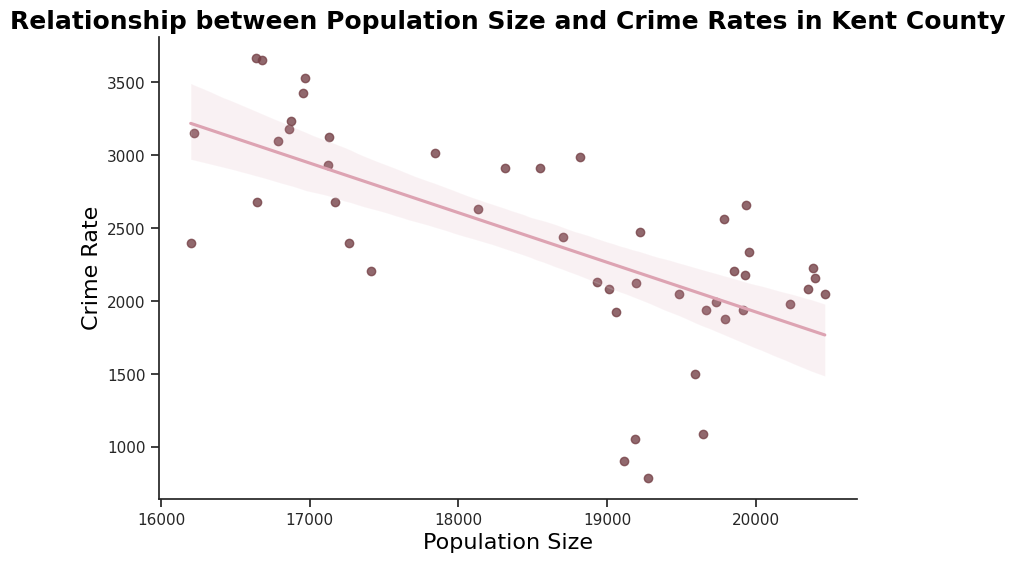

In [ ]:
#Correlation between population size and crime rate in Kent County
crime_by_population_size_Kent = crime_by_population_size[crime_by_population_size['JURISDICTION'] == 'Kent County']

correlation_matrix_Kent = crime_by_population_size_Kent['POPULATION'].corr(crime_by_population_size_Kent['OVERALL CRIME RATE PER 100,000 PEOPLE'])
print(correlation_matrix_Kent)

sns.set_style("ticks")
plt.figure(figsize = (9, 6))
sns.regplot(x = "POPULATION",
            y = "OVERALL CRIME RATE PER 100,000 PEOPLE",
            data = crime_by_population_size_Kent,
            scatter_kws = {'color': '#764248'},
            line_kws = {'color': '#DDA3B2'})
plt.title("Relationship between Population Size and Crime Rates in Kent County",
          fontsize = 18,
          weight = "bold",
          color = 'black')
plt.xlabel("Population Size", color = 'black', fontsize = 16)
plt.ylabel("Crime Rate", color = 'black', fontsize = 16)
sns.despine()
plt.show()

-0.9420808269360038


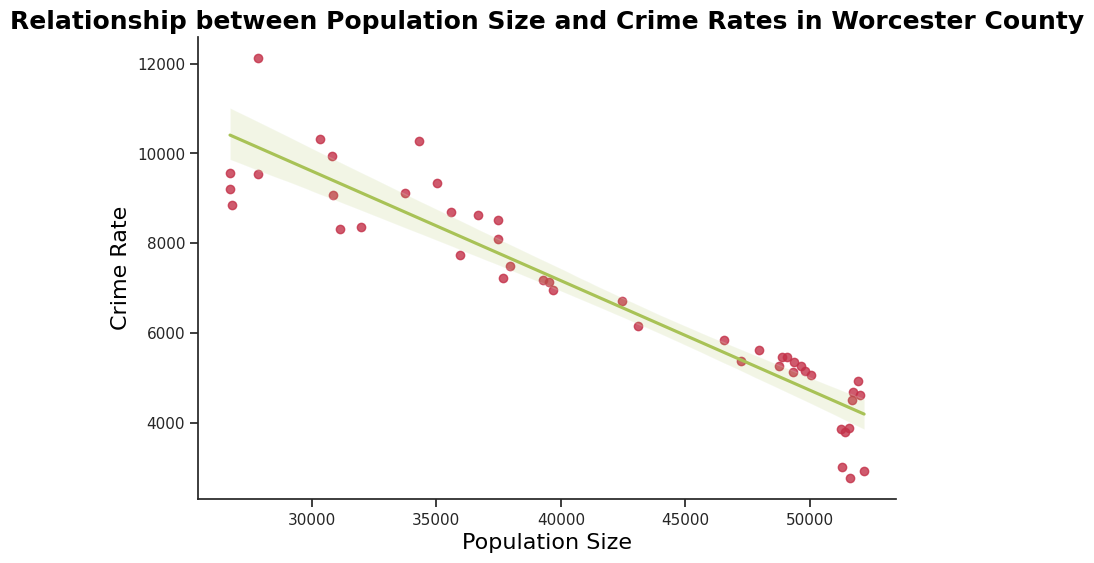

In [ ]:
#Correlation between population size and crime rate in Worcester County
crime_by_population_size_Worcester = crime_by_population_size[crime_by_population_size['JURISDICTION'] == 'Worcester County']

correlation_matrix_Worcester = crime_by_population_size_Worcester['POPULATION'].corr(crime_by_population_size_Worcester['OVERALL CRIME RATE PER 100,000 PEOPLE'])
print(correlation_matrix_Worcester)

sns.set_style("ticks")
plt.figure(figsize = (9, 6))
sns.regplot(x = "POPULATION",
            y = "OVERALL CRIME RATE PER 100,000 PEOPLE",
            data = crime_by_population_size_Worcester,
            scatter_kws = {'color': '#C33149'},
            line_kws = {'color': '#A8C256'})
plt.title("Relationship between Population Size and Crime Rates in Worcester County",
          fontsize = 18,
          weight = "bold",
          color = 'black')
plt.xlabel("Population Size", color = 'black', fontsize = 16)
plt.ylabel("Crime Rate", color = 'black', fontsize = 16)
sns.despine()
plt.show()

0.4857275760706281


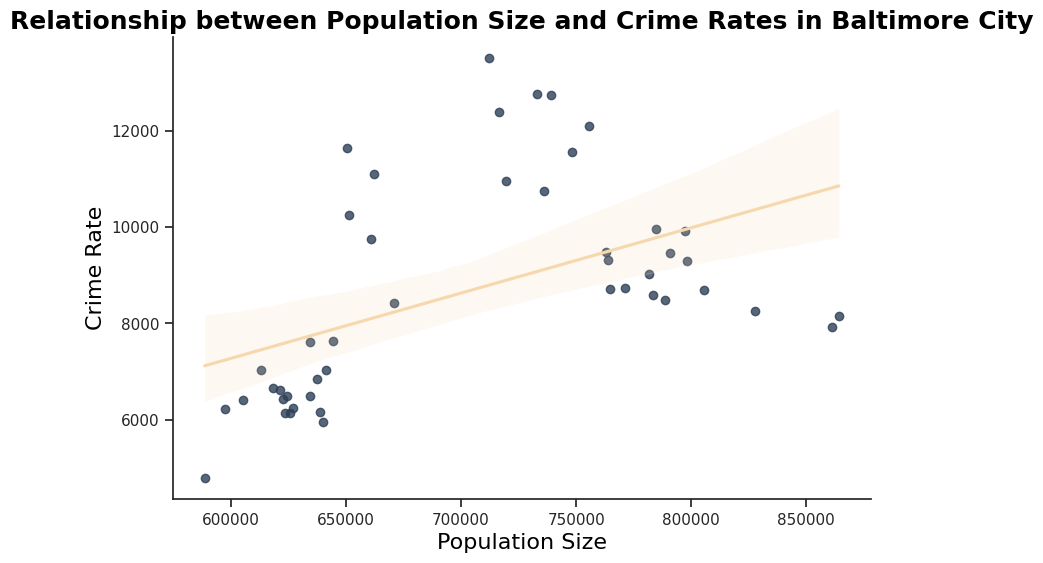

In [ ]:
#Correlation between population size and crime rate in Baltimore City
crime_by_population_size_BaltimoreCity = crime_by_population_size[crime_by_population_size['JURISDICTION'] == 'Baltimore City']

correlation_matrix_BaltimoreCity = crime_by_population_size_BaltimoreCity['POPULATION'].corr(crime_by_population_size_BaltimoreCity['OVERALL CRIME RATE PER 100,000 PEOPLE'])
print(correlation_matrix_BaltimoreCity)

sns.set_style("ticks")
plt.figure(figsize = (9, 6))
sns.regplot(x = "POPULATION",
            y = "OVERALL CRIME RATE PER 100,000 PEOPLE",
            data = crime_by_population_size_BaltimoreCity,
            scatter_kws = {'color': '#2E4057'},
            line_kws = {'color': '#F6D8AE'})
plt.title("Relationship between Population Size and Crime Rates in Baltimore City",
          fontsize = 18,
          weight = "bold",
          color = 'black')
plt.xlabel("Population Size", color = 'black', fontsize = 16)
plt.ylabel("Crime Rate", color = 'black', fontsize = 16)
sns.despine()
plt.show()

-0.7001098259547897


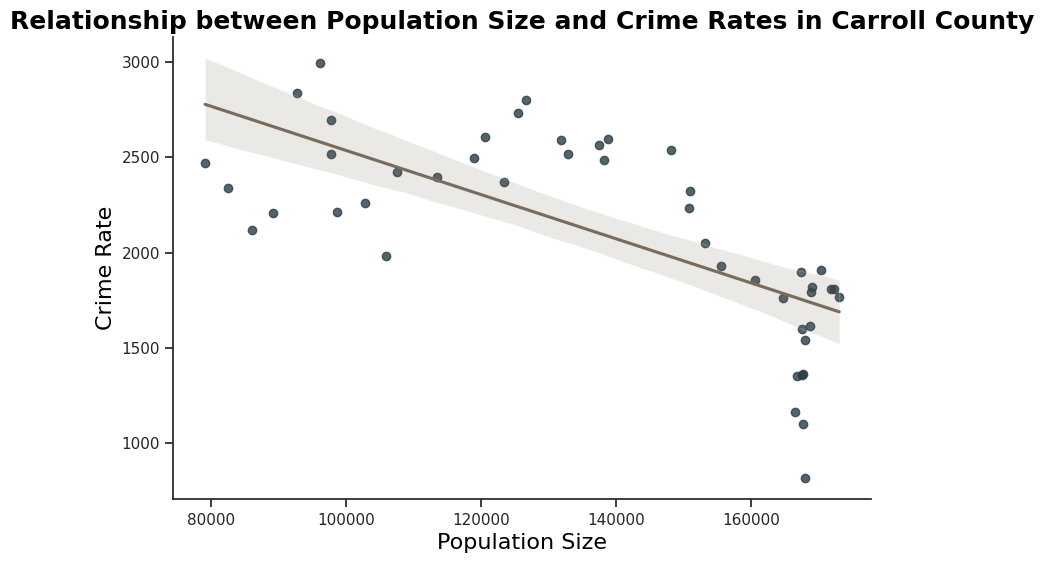

In [ ]:
#Correlation between population size and crime rate in Carroll County
crime_by_population_size_Carroll = crime_by_population_size[crime_by_population_size['JURISDICTION'] == 'Carroll County']

correlation_matrix_Carroll = crime_by_population_size_Carroll['POPULATION'].corr(crime_by_population_size_Carroll['OVERALL CRIME RATE PER 100,000 PEOPLE'])
print(correlation_matrix_Carroll)

sns.set_style("ticks")
plt.figure(figsize = (9, 6))
sns.regplot(x = "POPULATION",
            y = "OVERALL CRIME RATE PER 100,000 PEOPLE",
            data = crime_by_population_size_Carroll,
            scatter_kws = {'color': '#2A3D45'},
            line_kws = {'color': '#7A6C5D'})
plt.title("Relationship between Population Size and Crime Rates in Carroll County",
          fontsize = 18,
          weight = "bold",
          color = 'black')
plt.xlabel("Population Size", color = 'black', fontsize = 16)
plt.ylabel("Crime Rate", color = 'black', fontsize = 16)
sns.despine()
plt.show()

When considering all jurisdictions together, there appears to be a moderate, positive relationship between population size and the number of crimes occurring. Generally, less populated jurisdictions consistently have lower crime rates; however, this relationship becomes less pronounced in more populated areas. To further explore this, a random sample of four Maryland counties ranging in population size from small to very large was evaluated. Upon individual evaluation, the relationship between population size and crime rate became less clear. Surprisingly, the two smallest jurisdictions considered, Kent and Worcester Counties, showed a moderate to strong negative relationship between population size and crime rate, contrary to expectations. Only Baltimore City demonstrated a relationship in the expected direction, albeit moderately. Even the largest county considered, Carroll County, exhibited a strong negative relationship between population size and crime rate. Ultimately, factors beyond population size likely a play significant role in shaping crime rates across different jurisdictions.

### Crime Rate Changes

Analyze the rate percent change for different crime types. Which crimes have seen the most significant changes (increases or decreases) over the years?

In [ ]:
crime_rate_change = df.iloc[:, [0, 1] + list(range(-7,0))] #Extracting relevant columns
crime_rate_change

JURISDICTION  YEAR  MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0      Allegany County  1975                                             NaN   
1      Allegany County  1976                                           -36.7   
2      Allegany County  1977                                            53.3   
3      Allegany County  1978                                           -65.8   
4      Allegany County  1979                                             0.3   
...                ...   ...                                             ...   
1099  Worcester County  2016                                           201.8   
1100  Worcester County  2017                                           -33.5   
1101  Worcester County  2018                                          -100.0   
1102  Worcester County  2019                                             0.0   
1103  Worcester County  2020                                           191.6   

      RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                             NaN   
1                                           -62.0   
2                                           257.8   
3                                           -70.7   
4                                           251.1   
...                                           ...   
1099                                         14.0   
1100                                         52.5   
1101                                        -53.8   
1102                                         -0.6   
1103                                        155.4   

      ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                                NaN   
1                                               13.9   
2                                               36.3   
3                                              -42.2   
4                                                0.3   
...                                              ...   
1099                                            45.3   
1100                                             9.9   
1101                                           -44.1   
1102                                            -0.6   
1103                                            60.7   

      AGG. ASSAULT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                                   NaN      
1                                                 -50.9      
2                                                  47.3      
3                                                  -2.2      
4                                                   4.0      
...                                                 ...      
1099                                               -8.3      
1100                                               13.6      
1101                                              -16.8      
1102                                                6.2      
1103                                               71.5      

      B & E RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                              NaN   
1                                            -17.6   
2                                              4.2   
3                                             -6.5   
4                                             -6.6   
...                                            ...   
1099                                           6.5   
1100                                         -24.1   
1101                                          -2.1   
1102                                         -14.0   
1103                                           0.5   

      LARCENY THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                                   NaN       
1                                                  -7.8       
2                                                   2.7       
3                                                   2.7       
4                             

In [ ]:
#Calculating state average for each crime type
new_rows = []

crime_type_columns = [col for col in crime_rate_change.columns if col not in ['YEAR', 'JURISDICTION']] #Filtering out crime type columns

for year in crime_rate_change['YEAR'].unique(): #Loop through each unique year
    yearly_data = crime_rate_change[crime_rate_change['YEAR'] == year]

    avg_crime_rates = {crime_type: yearly_data[crime_type].mean() for crime_type in crime_type_columns} #Calculate state average for each crime type column
    avg_crime_rates['YEAR'] = year
    new_rows.append(avg_crime_rates)

crime_rate_state = pd.DataFrame(new_rows) #Convert the list of dictionaries to a df

crime_rate_state.head() #Display the new df

MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                             NaN   
1                                       40.962500   
2                                       26.329167   
3                                       91.875000   
4                                       81.670833   

   RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                          NaN   
1                                    60.066667   
2                                    29.008333   
3                                    -1.666667   
4                                   109.854167   

   ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                             NaN   
1                                      -17.800000   
2                                       -1.754167   
3                                       21.375000   
4                                       67.570833   

   AGG. ASSAULT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                                NaN      
1                                           4.333333      
2                                           9.841667      
3                                          10.312500      
4                                          22.283333      

   B & E RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                           NaN   
1                                     -3.287500   
2                                     -3.920833   
3                                     -1.766667   
4                                      7.870833   

   LARCENY THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                                NaN       
1                                           0.554167       
2                                          -5.050000       
3                                           1.229167       
4                                          16.054167       

   M/V THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE  YEAR  
0                                                NaN  1975  
1                                         -14.216667  1976  
2                                          17.462500  1977  
3                                          13.445833  1978  
4                                          13.562500  1979

In [ ]:
crime_rate_state.isna().sum() #Checking for missing values

MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE           1
RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE              1
ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE           1
AGG. ASSAULT  RATE PERCENT CHANGE PER 100,000 PEOPLE     1
B & E RATE PERCENT CHANGE PER 100,000 PEOPLE             1
LARCENY THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE    1
M/V THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE        1
YEAR                                                     0
dtype: int64

In [ ]:
crime_rate_state_clean = crime_rate_state.dropna() #Removing missing values
crime_rate_state_clean.head()

MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
1                                       40.962500   
2                                       26.329167   
3                                       91.875000   
4                                       81.670833   
5                                       22.675000   

   RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE  \
1                                    60.066667   
2                                    29.008333   
3                                    -1.666667   
4                                   109.854167   
5                                    12.154167   

   ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE  \
1                                      -17.800000   
2                                       -1.754167   
3                                       21.375000   
4                                       67.570833   
5                                        9.370833   

   AGG. ASSAULT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
1                                           4.333333      
2                                           9.841667      
3                                          10.312500      
4                                          22.283333      
5                                           1.204167      

   B & E RATE PERCENT CHANGE PER 100,000 PEOPLE  \
1                                     -3.287500   
2                                     -3.920833   
3                                     -1.766667   
4                                      7.870833   
5                                     10.891667   

   LARCENY THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
1                                           0.554167       
2                                          -5.050000       
3                                           1.229167       
4                                          16.054167       
5                                           3.079167       

   M/V THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE  YEAR  
1                                         -14.216667  1976  
2                                          17.462500  1977  
3                                          13.445833  1978  
4                                          13.562500  1979  
5                                           1.387500  1980

In [ ]:
crime_rate_state_clean.duplicated(subset="YEAR").sum() #Verifying there are no duplicates

0

In [ ]:
crime_rate_state_clean = crime_rate_state_clean.sort_values("YEAR").reset_index(drop=True) #Sorting year in ascending order
crime_rate_state_clean.head()

MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                       40.962500   
1                                       26.329167   
2                                       91.875000   
3                                       81.670833   
4                                       22.675000   

   RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                    60.066667   
1                                    29.008333   
2                                    -1.666667   
3                                   109.854167   
4                                    12.154167   

   ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                      -17.800000   
1                                       -1.754167   
2                                       21.375000   
3                                       67.570833   
4                                        9.370833   

   AGG. ASSAULT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                           4.333333      
1                                           9.841667      
2                                          10.312500      
3                                          22.283333      
4                                           1.204167      

   B & E RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                     -3.287500   
1                                     -3.920833   
2                                     -1.766667   
3                                      7.870833   
4                                     10.891667   

   LARCENY THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                           0.554167       
1                                          -5.050000       
2                                           1.229167       
3                                          16.054167       
4                                           3.079167       

   M/V THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE  YEAR  
0                                         -14.216667  1976  
1                                          17.462500  1977  
2                                          13.445833  1978  
3                                          13.562500  1979  
4                                           1.387500  1980

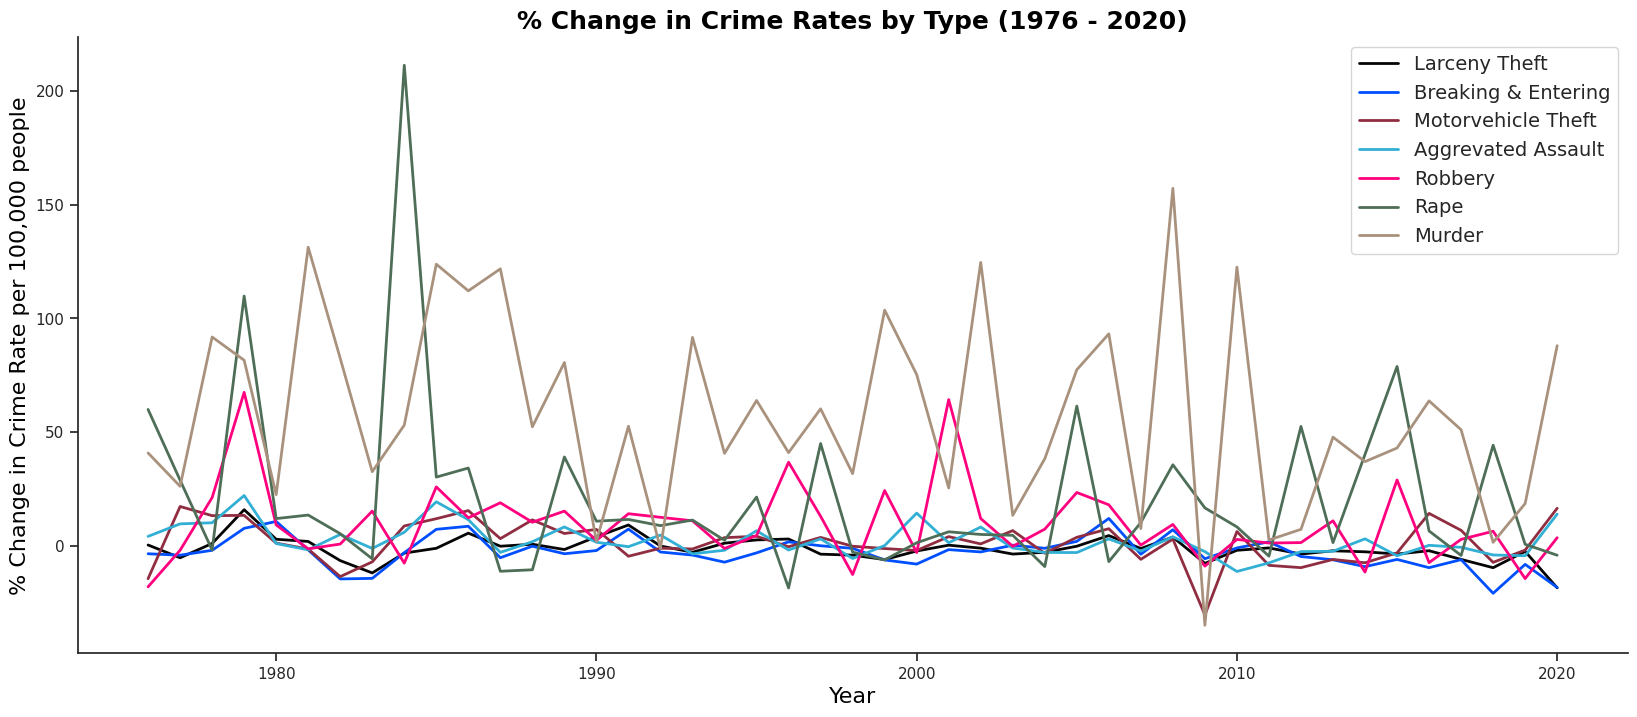

In [ ]:
#Visualizing the change in crime rates by type in Maryland
labels = ["Larceny Theft", "Breaking & Entering", "Motorvehicle Theft", "Aggrevated Assault", "Robbery", "Rape", "Murder"] #legend labels list
plt.figure(figsize = (20, 8))
sns.set_style("ticks")

plt.plot(crime_rate_state_clean["YEAR"], crime_rate_state_clean["LARCENY THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE"], color="#050505", linewidth=2)
plt.plot(crime_rate_state_clean["YEAR"], crime_rate_state_clean["B & E RATE PERCENT CHANGE PER 100,000 PEOPLE"], color="#004FFF", linewidth=2)
plt.plot(crime_rate_state_clean["YEAR"], crime_rate_state_clean["M/V THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE"], color="#902D41", linewidth=2)
plt.plot(crime_rate_state_clean["YEAR"], crime_rate_state_clean["AGG. ASSAULT  RATE PERCENT CHANGE PER 100,000 PEOPLE"], color="#31AFD4", linewidth=2)
plt.plot(crime_rate_state_clean["YEAR"], crime_rate_state_clean["ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE"], color="#FF007F", linewidth=2)
plt.plot(crime_rate_state_clean["YEAR"], crime_rate_state_clean["RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE"], color="#4E6E58", linewidth=2)
plt.plot(crime_rate_state_clean["YEAR"], crime_rate_state_clean["MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE"], color="#A9927D", linewidth=2)

plt.legend(labels = labels, loc = "upper right", fontsize=14)
plt.title("% Change in Crime Rates by Type (1976 - 2020)",
          fontsize = 18,
          weight = "bold",
          color = 'black')
plt.xlabel("Year", color = 'black', fontsize = 16)
plt.ylabel("% Change in Crime Rate per 100,000 people", color = 'black', fontsize = 16)
sns.despine()
plt.show()

Murder exhibits the highest volatility among all considered crime types, followed by rape. Over time, fluctuations in murder rates tend to vary significantly, likely due to the relatively low number of murders committed annually. With only a few dozen murders occurring each year, any additional incident can disproportionately impact the overall murder rate.

### Crime Hotspots

Identify crime hotspots. Which areas should be prioritized for increased policing and resource allocation?

In [6]:
crime_hotspots = df.iloc[:, [0, 1, 13, 16, 18]] #Extracting relevant columns
crime_hotspots = crime_hotspots.sort_values("YEAR")
crime_hotspots

JURISDICTION  YEAR  VIOLENT CRIME PERCENT  \
0         Allegany County  1975                    6.1   
46    Anne Arundel County  1975                    9.0   
598         Howard County  1975                    8.0   
414     Dorchester County  1975                   22.0   
1012      Wicomico County  1975                    7.6   
...                   ...   ...                    ...   
873       Somerset County  2020                   18.1   
919     St. Mary's County  2020                   12.3   
965         Talbot County  2020                   22.9   
505      Frederick County  2020                   16.8   
1103     Worcester County  2020                   15.2   

      PROPERTY CRIME PERCENT  OVERALL CRIME RATE PER 100,000 PEOPLE  
0                       93.9                                 2923.9  
46                      91.0                                 6759.7  
598                     92.0                                 5631.8  
414                     78.0                                 4737.0  
1012                    92.4                                 3532.9  
...                      ...                                    ...  
873                     81.9                                 1564.5  
919                     87.7                                 1529.4  
965                     77.1                                 1289.8  
505                     83.2                                 1020.8  
1103                    84.8                                 2943.0  

[1104 rows x 5 columns]

In [7]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data in Motion/7-1-24-Data Analyst Challege/Maryland_Physical_Boundaries_-_County_Boundaries_(Generalized).geojson' #Load GeoJSON file
gdf = gpd.read_file(file_path)

gdf.head()

OBJECTID          county  district  county_fip  countynum  \
0         1        Allegany       6.0           1          1   
1         2    Anne Arundel       5.0           3          2   
2         3       Baltimore       4.0           5          3   
3         4  Baltimore City       0.0         510         24   
4         5         Calvert       5.0           9          4   

                 creation_d                last_updat  shape_Length  \
0 2007-08-08 00:00:00+00:00 2012-01-20 00:00:00+00:00      2.648870   
1 2007-01-09 00:00:00+00:00 2008-07-01 00:00:00+00:00      2.229804   
2 2009-11-17 00:00:00+00:00 2012-02-15 00:00:00+00:00      2.895122   
3 2006-04-18 00:00:00+00:00 2009-11-16 00:00:00+00:00      0.642855   
4 2007-01-09 00:00:00+00:00 2008-07-08 00:00:00+00:00      1.435739   

   shape_Area                                           geometry  
0    0.114950  MULTIPOLYGON (((-78.38474 39.62421, -78.38468 ...  
1    0.121175  MULTIPOLYGON (((-76.53695 38.84800, -76.52852 ...  
2    0.168151  MULTIPOLYGON (((-76.44945 39.20231, -76.46189 ...  
3    0.024811  MULTIPOLYGON (((-76.52967 39.37196, -76.52975 ...  
4    0.059359  MULTIPOLYGON (((-76.52993 38.71352, -76.52909 ...

In [8]:
gdf['county'].unique()

#Creating a function that adds 'County' to all values in the 'county' column
def add_county_suffix(county_name):
    if county_name != 'Baltimore City':
        return county_name + ' County'
    else:
        return county_name

gdf['county'] = gdf['county'].apply(add_county_suffix) #Applying the function to modify the 'county' column
gdf

OBJECTID                  county  district  county_fip  countynum  \
0          1         Allegany County       6.0           1          1   
1          2     Anne Arundel County       5.0           3          2   
2          3        Baltimore County       4.0           5          3   
3          4          Baltimore City       0.0         510         24   
4          5          Calvert County       5.0           9          4   
5          6         Caroline County       2.0          11          5   
6          7          Carroll County       7.0          13          6   
7          8            Cecil County       2.0          15          7   
8          9          Charles County       5.0          17          8   
9         10       Dorchester County       1.0          19          9   
10        11        Frederick County       7.0          21         10   
11        12          Garrett County       6.0          23         11   
12        13          Harford County       4.0          25         12   
13        14           Howard County       7.0          27         13   
14        15             Kent County       2.0          29         14   
15        16       Montgomery County       3.0          31         15   
16        17  Prince George's County       3.0          33         16   
17        18     Queen Anne's County       2.0          35         17   
18        19         Somerset County       1.0          39         19   
19        20       St. Mary's County       5.0          37         18   
20        21           Talbot County       2.0          41         20   
21        22       Washington County       6.0          43         21   
22        23         Wicomico County       1.0          45         22   
23        24        Worcester County       1.0          47         23   

                  creation_d                last_updat  shape_Length  \
0  2007-08-08 00:00:00+00:00 2012-01-20 00:00:00+00:00      2.648870   
1  2007-01-09 00:00:00+00:00 2008-07-01 00:00:00+00:00      2.229804   
2  2009-11-17 00:00:00+00:00 2012-02-15 00:00:00+00:00      2.895122   
3  2006-04-18 00:00:00+00:00 2009-11-16 00:00:00+00:00      0.642855   
4  2007-01-09 00:00:00+00:00 2008-07-08 00:00:00+00:00      1.435739   
5  2007-05-21 00:00:00+00:00 2010-01-28 00:00:00+00:00      1.794944   
6  2008-06-16 00:00:00+00:00 2012-01-17 00:00:00+00:00      2.171271   
7  2006-04-18 00:00:00+00:00 2008-08-20 00:00:00+00:00      2.368363   
8  2006-04-18 00:00:00+00:00 2010-06-21 00:00:00+00:00      2.221323   
9  2006-04-18 00:00:00+00:00 2007-02-22 00:00:00+00:00      3.769861   
10 2012-01-10 00:00:00+00:00 2012-01-10 00:00:00+00:00      2.164356   
11 2007-05-15 00:00:00+00:00 2012-02-15 00:00:00+00:00      2.065467   
12 2006-10-30 00:00:00+00:00 2012-02-15 00:00:00+00:00      2.198623   
13 2006-11-16 00:00:00+00:00 2009-11-16 00:00:00+00:00      1.678027   
14 2008-06-17 00:00:00+00:00 2010-03-05 00:00:00+00:00      1.808965   
15 2006-12-15 00:00:00+00:00 2011-08-12 00:00:00+00:00      2.005797   
16 2007-04-26 00:00:00+00:00 2011-04-18 00:00:00+00:00      2.245886   
17 2006-04-18 00:00:00+00:00 2010-07-07 00:00:00+00:00      2.521639   
18 2007-01-08 00:00:00+00:00 2007-01-08 00:00:00+00:00      3.329519   
19 2006-12-21 00:00:00+00:00 2010-05-11 00:00:00+00:00      1.984432   
20 2007-04-05 00:00:00+00:00 2009-06-22 00:00:00+00:00      2.464829   
21 2007-08-08 00:00:00+00:00 2012-01-10 00:00:00+00:00      3.082411   
22 2007-11-26 00:00:00+00:00 2009-04-24 00:00:00+00:00      1.961362   
23 2006-04-18 00:00:00+00:00 2008-06-05 00:00:00+00:00      2.196997   

    shape_Area                                           geometry  
0     0.114950  MULTIPOLYGON (((-78.38474 39.62421, -78.38468 ...  
1     0.121175  MULTIPOLYGON (((-76.53695 38.84800, -76.52852 ...  
2     0.168151  MULTIPOLYGON (((-76.44945 39.20231, -76.46189 ...  
3     0.024811  MULTIPOLYGON (((-76.52967 39.37196, -76.52975 ...  
4     0.059359  MULTIPOLYGON (((-76.5

In [9]:
merged_df = gdf.set_index('county').join(crime_hotspots.set_index('JURISDICTION')) #Merging df and geodf
merged_df = merged_df.reset_index()
merged_df.head()

county  OBJECTID  district  county_fip  countynum  \
0  Allegany County         1       6.0           1          1   
1  Allegany County         1       6.0           1          1   
2  Allegany County         1       6.0           1          1   
3  Allegany County         1       6.0           1          1   
4  Allegany County         1       6.0           1          1   

                 creation_d                last_updat  shape_Length  \
0 2007-08-08 00:00:00+00:00 2012-01-20 00:00:00+00:00       2.64887   
1 2007-08-08 00:00:00+00:00 2012-01-20 00:00:00+00:00       2.64887   
2 2007-08-08 00:00:00+00:00 2012-01-20 00:00:00+00:00       2.64887   
3 2007-08-08 00:00:00+00:00 2012-01-20 00:00:00+00:00       2.64887   
4 2007-08-08 00:00:00+00:00 2012-01-20 00:00:00+00:00       2.64887   

   shape_Area                                           geometry  YEAR  \
0     0.11495  MULTIPOLYGON (((-78.38474 39.62421, -78.38468 ...  1975   
1     0.11495  MULTIPOLYGON (((-78.38474 39.62421, -78.38468 ...  1976   
2     0.11495  MULTIPOLYGON (((-78.38474 39.62421, -78.38468 ...  1977   
3     0.11495  MULTIPOLYGON (((-78.38474 39.62421, -78.38468 ...  1978   
4     0.11495  MULTIPOLYGON (((-78.38474 39.62421, -78.38468 ...  1979   

   VIOLENT CRIME PERCENT  PROPERTY CRIME PERCENT  \
0                    6.1                    93.9   
1                    4.1                    95.9   
2                    5.7                    94.3   
3                    4.8                    95.2   
4                    4.7                    95.3   

   OVERALL CRIME RATE PER 100,000 PEOPLE  
0                                 2923.9  
1                                 2532.1  
2                                 2693.0  
3                                 2664.9  
4                                 2912.7

In [10]:
#Determining the top 5 counties with the highest overall crime rates in the last five years
def top_5_counties_with_highest_crime_rate(merged_df, Year):
    year_data = merged_df[merged_df['YEAR'] == Year] #Filter data for the selected year

    top_counties = year_data.sort_values(by='OVERALL CRIME RATE PER 100,000 PEOPLE', ascending=False).head(5) #Sort counties by overall crime rate in descending order and select top 5

    print(f"Top 5 counties with the highest overall crime rates in {Year}:") #Print the top 5 counties with their crime rates
    for idx, row in top_counties.iterrows():
        print(f"{row['county']}: {row['OVERALL CRIME RATE PER 100,000 PEOPLE']}")

print(top_5_counties_with_highest_crime_rate(merged_df, 2020)) #Top 5 counties with the highest overall crime rates in 2020
print(top_5_counties_with_highest_crime_rate(merged_df, 2019)) #Top 5 counties with the highest overall crime rates in 2019
print(top_5_counties_with_highest_crime_rate(merged_df, 2018)) #Top 5 counties with the highest overall crime rates in 2018
print(top_5_counties_with_highest_crime_rate(merged_df, 2017)) #Top 5 counties with the highest overall crime rates in 2017
print(top_5_counties_with_highest_crime_rate(merged_df, 2016)) #Top 5 counties with the highest overall crime rates in 2016

Top 5 counties with the highest overall crime rates in 2020:
Baltimore City: 4782.1
Dorchester County: 3093.7
Worcester County: 2943.0
Baltimore County: 2423.9
Allegany County: 2193.7
None
Top 5 counties with the highest overall crime rates in 2019:
Baltimore City: 6231.8
Dorchester County: 3190.1
Baltimore County: 3043.5
Worcester County: 2774.9
Wicomico County: 2743.7
None
Top 5 counties with the highest overall crime rates in 2018:
Baltimore City: 6406.3
Baltimore County: 3157.5
Dorchester County: 3116.4
Wicomico County: 3091.4
Worcester County: 3023.2
None
Top 5 counties with the highest overall crime rates in 2017:
Baltimore City: 7033.7
Dorchester County: 4373.1
Worcester County: 3793.2
Allegany County: 3467.1
Wicomico County: 3417.9
None
Top 5 counties with the highest overall crime rates in 2016:
Baltimore City: 6650.9
Worcester County: 3876.7
Dorchester County: 3434.7
Wicomico County: 3418.4
Baltimore County: 3361.2
None


In [26]:
#Choropleth showing change in overall crime rates across Maryland counties
overall_df = merged_df.loc[:, ['YEAR', 'county', 'county_fip', 'geometry', 'OVERALL CRIME RATE PER 100,000 PEOPLE']]
overall_df['YEAR'] = overall_df['YEAR'].astype(str)  # Change year to string variable
overall_df['geometry'] = overall_df['geometry'].simplify(tolerance=0.005)  # Simplifying geometry

def plot_choropleth(Year):
    year_data = overall_df[overall_df['YEAR'] == Year] #Filtering data for the selected year

    fig, ax = plt.subplots(1, 1, figsize=(12, 8)) #Specifying figure parameters
    ax.set_title(f'Overall Crime Rates in Maryland ({Year})', color='black', fontweight='bold', fontsize=20, pad=20)

    year_data.plot(column='OVERALL CRIME RATE PER 100,000 PEOPLE', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8',  #Plotting data
                   legend=True, legend_kwds={'label': "Overall Crime Rate", 'orientation': "horizontal"})

    for idx, row in gdf.iterrows(): #Adding county names to the map
        centroid = row['geometry'].centroid  #Get centroid of the county geometry
        centroid_x, centroid_y = centroid.x, centroid.y  #Extract centroid coordinates
        county_name = row['county']

        label_lines = county_name.split() #Split county name into two lines

        ax.annotate(text='\n'.join(label_lines), xy=(centroid_x, centroid_y), xytext=(0, 0), textcoords='offset points', fontsize=8, #Add county names on the map with two lines
                    ha='center', va='center', color='black')  #Center the annotation text

    ax.axis('off') #Remove axes
    ax.set_aspect('equal')
    ax.margins(x=0, y=0)

    plt.show()

years = sorted(overall_df['YEAR'].unique()) #Get unique years for the slider

interact(plot_choropleth, Year=years) #Create interactive slider

interactive(children=(Dropdown(description='Year', options=('1975', '1976', '1977', '1978', '1979', '1980', '1…

<function __main__.plot_choropleth(Year)>

In the last five years, Baltimore City has consistently recorded the highest overall crime rates in Maryland. Additionally, Dorchester, Worcester, Baltimore, Wicomico, and Allegany Counties have consistently ranked among the top five counties with the highest overall crime rates in the state.

In [ ]:
#Determining the top 5 counties with the highest violent crime rates in the last five years
def top_5_counties_with_highest_violent_crime_rate(merged_df, Year):
    year_data = merged_df[merged_df['YEAR'] == Year] #Filter data for the selected year

    top_counties = year_data.sort_values(by='VIOLENT CRIME PERCENT', ascending=False).head(5) #Sort counties by violent crime rate in descending order and select top 5

    print(f"Top 5 counties with the highest violent crime rates in {Year}:") #Print the top 5 counties with their violent crime rates
    for idx, row in top_counties.iterrows():
        print(f"{row['county']}: {row['VIOLENT CRIME PERCENT']}")

print(top_5_counties_with_highest_violent_crime_rate(merged_df, 2020)) #Top 5 counties with the highest violent crime rates in 2020
print(top_5_counties_with_highest_violent_crime_rate(merged_df, 2019)) #Top 5 counties with the highest violent crime rates in 2019
print(top_5_counties_with_highest_violent_crime_rate(merged_df, 2018)) #Top 5 counties with the highest violent crime rates in 2018
print(top_5_counties_with_highest_violent_crime_rate(merged_df, 2017)) #Top 5 counties with the highest violent crime rates in 2017
print(top_5_counties_with_highest_violent_crime_rate(merged_df, 2016)) #Top 5 counties with the highest violent crime rates in 2016

Top 5 counties with the highest violent crime rates in 2020:
Baltimore City: 33.7
Talbot County: 22.9
Wicomico County: 22.5
Queen Anne's County: 21.5
Washington County: 21.2
None
Top 5 counties with the highest violent crime rates in 2019:
Baltimore City: 30.1
Charles County: 18.9
Baltimore County: 18.8
Garrett County: 18.3
Washington County: 17.9
None
Top 5 counties with the highest violent crime rates in 2018:
Baltimore City: 28.9
Somerset County: 24.3
Charles County: 20.6
Baltimore County: 18.5
Washington County: 17.4
None
Top 5 counties with the highest violent crime rates in 2017:
Baltimore City: 29.0
Somerset County: 21.1
Frederick County: 19.0
Washington County: 17.9
Baltimore County: 17.8
None
Top 5 counties with the highest violent crime rates in 2016:
Baltimore City: 27.0
Somerset County: 18.9
Charles County: 17.9
Queen Anne's County: 16.1
Frederick County: 15.9
None


In [ ]:
#Choropleth showing change in violent crime rates across Maryland counties
violent_df = merged_df.loc[:,['YEAR','county', 'county_fip', 'geometry', 'VIOLENT CRIME PERCENT']] #Selecting relvant columns
violent_df['YEAR'] = violent_df['YEAR'].astype(str) #Change year to string variable
violent_df['geometry'] = violent_df['geometry'].simplify(tolerance=0.005) #Simplifying geometry to reduce memory used to create plot

def plot_choropleth(Year):
    year_data = violent_df[violent_df['YEAR'] == Year] #Filtering data for the selected year

    fig, ax = plt.subplots(1, 1, figsize=(12, 8)) #Specifying figure parameters
    ax.set_title(f'Violent Crime Rates in Maryland ({Year})', color='black', fontweight='bold', fontsize=20, pad=20)

    year_data.plot(column='VIOLENT CRIME PERCENT', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8',  #Plotting data
                   legend=True, legend_kwds={'label': "Violent Crime Rate", 'orientation': "horizontal"})

    for idx, row in gdf.iterrows(): #Adding county names to the map
        centroid = row['geometry'].centroid  #Get centroid of the county geometry
        centroid_x, centroid_y = centroid.x, centroid.y  #Extract centroid coordinates
        county_name = row['county']

        label_lines = county_name.split() #Split county name into two lines

        ax.annotate(text='\n'.join(label_lines), xy=(centroid_x, centroid_y), xytext=(0, 0), textcoords='offset points', fontsize=8, #Add county names on the map with two lines
                    ha='center', va='center', color='black')  #Center the annotation text

    ax.axis('off') #Remove axes
    ax.set_aspect('equal')
    ax.margins(x=0, y=0)

    plt.show()

years = sorted(violent_df['YEAR'].unique()) #Get unique years for the slider

interact(plot_choropleth, Year=years) #Create interactive slider

interactive(children=(Dropdown(description='Year', options=('1975', '1976', '1977', '1978', '1979', '1980', '1…

<function __main__.plot_choropleth(Year)>

In the last five years, Baltimore City has consistently recorded the highest violent crime rates in Maryland. Additionally, Washington, Charles, Baltimore, and Somerset Counties have consistently ranked among the top five counties with the highest violent crime rates in the state.

In [ ]:
#Determining the top 5 counties with the highest property crime rates in the last five years
def top_5_counties_with_highest_property_crime_rate(merged_df, Year):
    year_data = merged_df[merged_df['YEAR'] == Year] #Filter data for the selected year

    top_counties = year_data.sort_values(by='PROPERTY CRIME PERCENT', ascending=False).head(5) #Sort counties by property crime rate in descending order and select top 5

    print(f"Top 5 counties with the highest property crime rates in {Year}:") #Print the top 5 counties with their property crime rates
    for idx, row in top_counties.iterrows():
        print(f"{row['county']}: {row['PROPERTY CRIME PERCENT']}")

print(top_5_counties_with_highest_property_crime_rate(merged_df, 2020)) #Top 5 counties with the highest property crime rates in 2020
print(top_5_counties_with_highest_property_crime_rate(merged_df, 2019)) #Top 5 counties with the highest property crime rates in 2019
print(top_5_counties_with_highest_property_crime_rate(merged_df, 2018)) #Top 5 counties with the highest property crime rates in 2018
print(top_5_counties_with_highest_property_crime_rate(merged_df, 2017)) #Top 5 counties with the highest property crime rates in 2017
print(top_5_counties_with_highest_property_crime_rate(merged_df, 2016)) #Top 5 counties with the highest property crime rates in 2016

Top 5 counties with the highest property crime rates in 2020:
Howard County: 90.1
Montgomery County: 89.4
St. Mary's County: 87.7
Cecil County: 86.6
Carroll County: 86.4
None
Top 5 counties with the highest property crime rates in 2019:
Caroline County: 91.7
Worcester County: 90.9
Kent County: 89.7
Howard County: 89.3
St. Mary's County: 89.1
None
Top 5 counties with the highest property crime rates in 2018:
Worcester County: 92.0
Caroline County: 89.9
Talbot County: 89.8
Calvert County: 89.3
St. Mary's County: 88.5
None
Top 5 counties with the highest property crime rates in 2017:
Talbot County: 92.6
Caroline County: 91.6
Worcester County: 90.9
St. Mary's County: 90.2
Allegany County: 90.2
None
Top 5 counties with the highest property crime rates in 2016:
Worcester County: 92.4
Caroline County: 91.5
St. Mary's County: 90.1
Talbot County: 89.5
Montgomery County: 89.5
None


In [ ]:
#Choropleth showing change in property crime rates across Maryland counties
property_df = merged_df.loc[:,['YEAR','county', 'county_fip', 'geometry', 'PROPERTY CRIME PERCENT']] #Selecting relvant columns
property_df['YEAR'] = property_df['YEAR'].astype(str) #Change year to string variable
property_df['geometry'] = property_df['geometry'].simplify(tolerance=0.005) #Simplifying geometry to reduce memory used to create plot

def plot_choropleth(Year):
    year_data = property_df[property_df['YEAR'] == Year] #Filtering data for the selected year

    fig, ax = plt.subplots(1, 1, figsize=(12, 8)) #Specifying figure parameters
    ax.set_title(f'Property Crime Rates in Maryland ({Year})', color='black', fontweight='bold', fontsize=20, pad=20)

    year_data.plot(column='PROPERTY CRIME PERCENT', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', #Plotting data
                   legend=True, legend_kwds={'label': "Property Crime Rate", 'orientation': "horizontal"})

    for idx, row in gdf.iterrows(): #Adding county names to the map
        centroid = row['geometry'].centroid  #Get centroid of the county geometry
        centroid_x, centroid_y = centroid.x, centroid.y  #Extract centroid coordinates
        county_name = row['county']

        label_lines = county_name.split()  #Split county name into two lines

        ax.annotate(text='\n'.join(label_lines), xy=(centroid_x, centroid_y), xytext=(0, 0), textcoords='offset points', fontsize=8, #Add county names on the map with two lines
                    ha='center', va='center', color='black')  #Center the annotation text

    ax.axis('off') #Remove axes
    ax.set_aspect('equal')
    ax.margins(x=0, y=0)

    plt.show()


years = sorted(property_df['YEAR'].unique()) #Get unique years for the slider

interact(plot_choropleth, Year=years) #Create interactive slider

interactive(children=(Dropdown(description='Year', options=('1975', '1976', '1977', '1978', '1979', '1980', '1…

<function __main__.plot_choropleth(Year)>

In the last five years, St. Mary's, Caroline, and Worcester Counties have consistently ranked among the top five counties with the highest property crime rates in the state.

# Saving File

In [20]:
import subprocess

In [25]:
# Path to your notebook
notebook_path = "/content/drive/MyDrive/Colab Notebooks/Data in Motion/7-1-24-Data Analyst Challege/Data Analysis Challenge - Maryland Crime Data.ipynb"
# Output directory
output_dir = '/content/drive/MyDrive/Colab Notebooks/Data in Motion/7-1-24-Data Analyst Challege/'

# Convert notebook to HTML
subprocess.run([
    'jupyter', 'nbconvert',
    '--to', 'html',
    '--execute',
    '--output-dir', output_dir,
    notebook_path
])

KeyboardInterrupt: 